# Trabajo Tutorial Básico


Recreación figura 8(a) [paper](https://iopscience.iop.org/article/10.3847/1538-4357/abbb34/pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/table4.csv')
df.head()

,QSO,zabs,Ncld,vcld,N-MgII,e_NMgII,bMgII,e_b-MgII,N-FeII,e_N-FeII,...,b-MgI,e_b-MgI,N-MnII,e_N-MnII,b-MnII,e_b-MnII,N-CaII,e_N-CaII,b-CaII,e_b-CaII
0,J000149-015939,0.870821,1,-93.01,13.10,0.035,5.76,0.185,13.32,0.023,...,5.76,0.185,11.19,-1.0,0.0,0.0,11.14,-1.0,0.0,0.0
1,J000149-015939,0.870821,2,-52.58,12.59,0.241,7.99,2.502,12.53,0.237,...,7.99,2.502,11.27,-1.0,0.0,0.0,11.25,-1.0,0.0,0.0
2,J000149-015939,0.870821,3,-46.49,13.03,0.190,3.18,0.435,12.93,0.096,...,3.18,0.435,11.08,-1.0,0.0,0.0,11.09,-1.0,0.0,0.0
3,J000149-015939,0.870821,4,-32.94,12.45,0.244,5.81,1.691,12.41,0.090,...,0.00,0.000,11.19,-1.0,0.0,0.0,11.21,-1.0,0.0,0.0
4,J000149-015939,0.870821,5,-23.87,12.51,0.373,17.61,9.999,11.47,-1.000,...,0.00,0.000,11.43,-1.0,0.0,0.0,11.41,-1.0,0.0,0.0


In [3]:
zs = pd.read_csv('Data/table1.csv')
zs.head()

,QSO,zem
0,J000149-015939,2.817
1,J000323-260318,4.111
2,J000344-232355,2.280
3,J000448-415728,2.760
4,J000520+052411,1.900


In [4]:
log_N_MgII = df['N-MgII']

err_log_N_MgII = df['e_NMgII']

In [5]:
bins = np.linspace(log_N_MgII.min(), log_N_MgII.max(), 14)
hist, bin_edges = np.histogram(log_N_MgII, bins=bins)

In [6]:
bins_centers = bin_edges + np.abs((bin_edges[0]-bin_edges[1])/2)
print(bins_centers)
print(bin_edges)
print(np.abs((bin_edges[0]-bin_edges[1])))

[10.79576923 11.30730769 11.81884615 12.33038462 12.84192308 13.35346154
 13.865      14.37653846 14.88807692 15.39961538 15.91115385 16.42269231
 16.93423077 17.44576923]
[10.54       11.05153846 11.56307692 12.07461538 12.58615385 13.09769231
 13.60923077 14.12076923 14.63230769 15.14384615 15.65538462 16.16692308
 16.67846154 17.19      ]
0.5115384615384624


In [7]:
df['bin'] = pd.cut(df['N-MgII'], bins = bins, labels = False)

In [8]:
bin_err = df.groupby('bin')['e_NMgII'].apply(lambda x: np.sqrt(np.sum(x**2)))

In [9]:
df.head()

,QSO,zabs,Ncld,vcld,N-MgII,e_NMgII,bMgII,e_b-MgII,N-FeII,e_N-FeII,...,e_b-MgI,N-MnII,e_N-MnII,b-MnII,e_b-MnII,N-CaII,e_N-CaII,b-CaII,e_b-CaII,bin
0,J000149-015939,0.870821,1,-93.01,13.10,0.035,5.76,0.185,13.32,0.023,...,0.185,11.19,-1.0,0.0,0.0,11.14,-1.0,0.0,0.0,5.0
1,J000149-015939,0.870821,2,-52.58,12.59,0.241,7.99,2.502,12.53,0.237,...,2.502,11.27,-1.0,0.0,0.0,11.25,-1.0,0.0,0.0,4.0
2,J000149-015939,0.870821,3,-46.49,13.03,0.190,3.18,0.435,12.93,0.096,...,0.435,11.08,-1.0,0.0,0.0,11.09,-1.0,0.0,0.0,4.0
3,J000149-015939,0.870821,4,-32.94,12.45,0.244,5.81,1.691,12.41,0.090,...,0.000,11.19,-1.0,0.0,0.0,11.21,-1.0,0.0,0.0,3.0
4,J000149-015939,0.870821,5,-23.87,12.51,0.373,17.61,9.999,11.47,-1.000,...,0.000,11.43,-1.0,0.0,0.0,11.41,-1.0,0.0,0.0,3.0


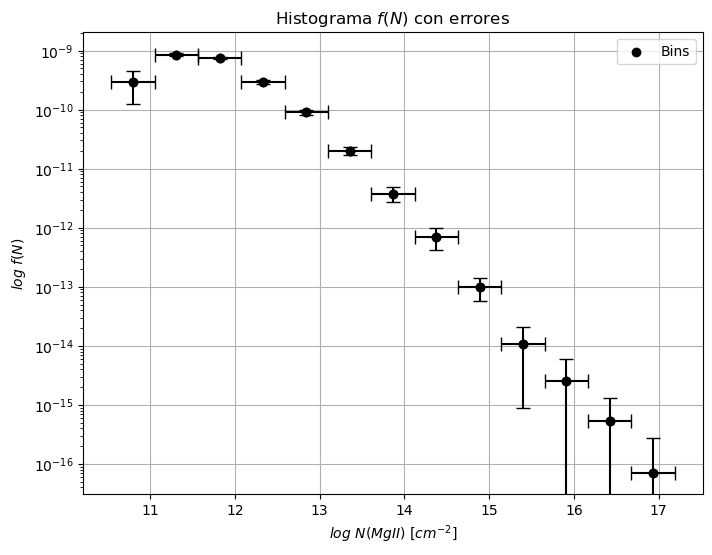

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(bins_centers[:-1], hist / 10**bins_centers[:-1], label='Bins', color='black')
plt.errorbar(bins_centers[:-1], hist / 10**bins_centers[:-1], xerr=(bin_edges[1:] - bin_edges[:-1]) / 2,
             yerr=bin_err/ 10**bins_centers[:-1] , fmt='o', color='black', capsize=5)



# Configurar ejes y escala logarítmica
plt.yscale('log')
plt.ylabel(r'$log \ f(N)$')
plt.xlabel(r'$log \ N(MgII) \ [cm^{-2}]$')
plt.title('Histograma $f(N)$ con errores')
plt.legend()
plt.grid()
plt.show()

In [11]:
df['e_NMgII'].max()

9.999

In [12]:
vp_fit = df[df['N-MgII']>12.4]

In [13]:
vp_fit['N-MgII'].min()

12.41

In [14]:
x_min = 10**vp_fit['N-MgII'].min()

vp = 10**vp_fit['N-MgII']
vp_e = 10**vp_fit['e_NMgII']

n=len(vp)
n_e = len(vp_e)

In [15]:
from uncertainties import unumpy

In [16]:
delta = 1 + n / np.sum(np.log(vp / x_min))

print(delta)


1.4519771801986199


In [17]:
vp_fit.head()

,QSO,zabs,Ncld,vcld,N-MgII,e_NMgII,bMgII,e_b-MgII,N-FeII,e_N-FeII,...,e_b-MgI,N-MnII,e_N-MnII,b-MnII,e_b-MnII,N-CaII,e_N-CaII,b-CaII,e_b-CaII,bin
0,J000149-015939,0.870821,1,-93.01,13.10,0.035,5.76,0.185,13.32,0.023,...,0.185,11.19,-1.0,0.0,0.0,11.14,-1.0,0.0,0.0,5.0
1,J000149-015939,0.870821,2,-52.58,12.59,0.241,7.99,2.502,12.53,0.237,...,2.502,11.27,-1.0,0.0,0.0,11.25,-1.0,0.0,0.0,4.0
2,J000149-015939,0.870821,3,-46.49,13.03,0.190,3.18,0.435,12.93,0.096,...,0.435,11.08,-1.0,0.0,0.0,11.09,-1.0,0.0,0.0,4.0
3,J000149-015939,0.870821,4,-32.94,12.45,0.244,5.81,1.691,12.41,0.090,...,0.000,11.19,-1.0,0.0,0.0,11.21,-1.0,0.0,0.0,3.0
4,J000149-015939,0.870821,5,-23.87,12.51,0.373,17.61,9.999,11.47,-1.000,...,0.000,11.43,-1.0,0.0,0.0,11.41,-1.0,0.0,0.0,3.0


In [18]:
logN = 10**vp_fit['N-MgII']
e_N = np.log(10)*logN*vp_fit['e_NMgII']

In [19]:
N_min = logN.min()
N_unc = unumpy.uarray(logN, e_N)

In [20]:
# Calcular logaritmos y delta
log_ratios_with_unc = unumpy.log(N_unc / N_min)
delta_with_unc = 1 + len(N_unc) / log_ratios_with_unc.sum()

# Extraer valor nominal y error
delta_nominal = unumpy.nominal_values(delta_with_unc)
delta_std_dev = unumpy.std_devs(delta_with_unc)

print(delta_nominal)
print(delta_std_dev)

1.4519771801986185
0.036629117289198994


In [21]:
C = (delta_with_unc - 1) * (N_min ** (delta_with_unc - 1))
print(unumpy.nominal_values(C))
print(unumpy.std_devs(C))

183718.67924351123
207183.5881747278


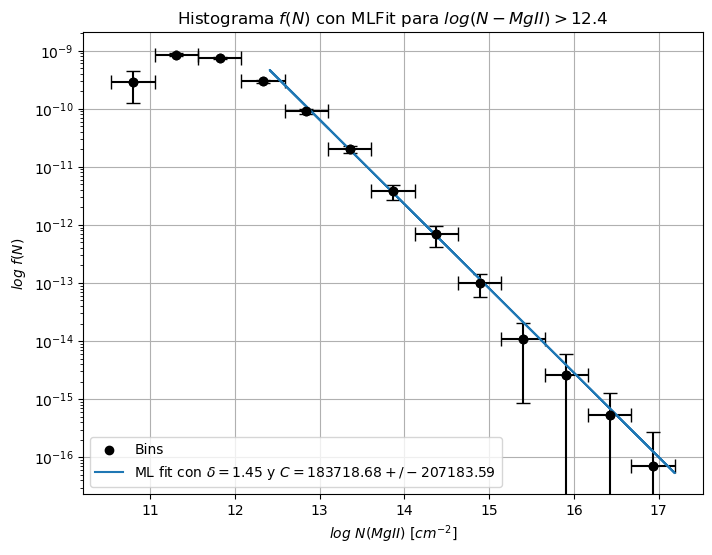

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(bins_centers[:-1], hist / 10**bins_centers[:-1], label='Bins', color='black')
plt.errorbar(bins_centers[:-1], hist / 10**bins_centers[:-1], xerr=(bin_edges[1:] - bin_edges[:-1]) / 2,
             yerr=bin_err/ 10**bins_centers[:-1] , fmt='o', color='black', capsize=5)


#plt.plot(vp_fit['N-MgII'], delta*vp_fit['N-MgII']/10**vp_fit['N-MgII']+np.log(C)/10**vp_fit['N-MgII'], label = fr'ML fit con $\delta={delta:.2f}$ y $C={C:.2f}$')
plt.plot(vp_fit['N-MgII'], (9.85*10**8-5*10**8)*(10**(vp_fit['N-MgII']))**(-delta), label = fr'ML fit con $\delta={delta:.2f}$ y $C={C:.2f}$')
# Configurar ejes y escala logarítmica
plt.yscale('log')
plt.ylabel(r'$log \ f(N)$')
plt.xlabel(r'$log \ N(MgII) \ [cm^{-2}]$')
plt.title('Histograma $f(N)$ con MLFit para $log(N-MgII)>12.4$')
plt.legend()
plt.grid()
plt.show()

In [23]:
bins_centers_fit = bins_centers[3:]

hist_fit = hist[3:]

bin_err_fit = bin_err[3:]


C:\Users\Agustín\AppData\Local\Temp\ipykernel_8968\801092713.py:5: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  bin_err_fit = bin_err[3:]


In [24]:
len(bin_err_fit)+1==len(bins_centers_fit)

True

<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Agustín\AppData\Local\Temp\ipykernel_8968\433637659.py:22: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(x_fit, 10**y_fit, color='red', label=f"Regresión lineal ($\delta$={slope:.2f}, $C$={intercept:.2f})")


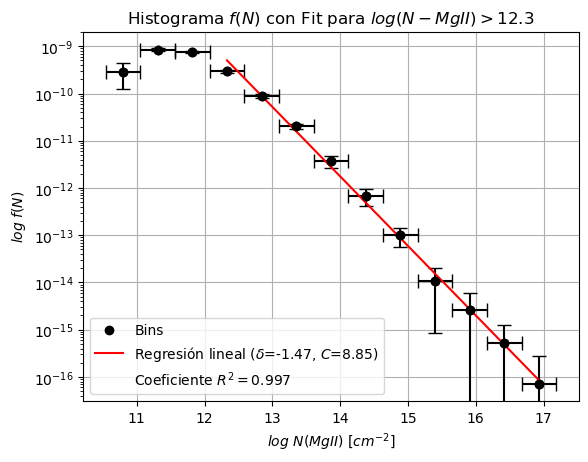

Pendiente (slope): -1.4715798241935438
Intersección (intercept): 8.848244838859593
Coeficiente de determinación (r^2): 0.9969670848313306


In [25]:
from scipy.stats import linregress



# Transformamos el eje y: hist_fit / 10**bins_centers_fit
y_transformed = hist_fit / 10**bins_centers_fit[:-1]

# Tomamos el logaritmo de los valores transformados
log_y = np.log10(y_transformed)

# Realizamos la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(bins_centers_fit[:-1], log_y)

# Creamos la línea ajustada
x_fit = bins_centers_fit[:-1]
y_fit = slope * x_fit + intercept

# Graficamos los datos y la línea ajustada
plt.scatter(bins_centers[:-1], hist / 10**bins_centers[:-1], label='Bins', color='black')
plt.errorbar(bins_centers[:-1], hist / 10**bins_centers[:-1], xerr=(bin_edges[1:] - bin_edges[:-1]) / 2,
             yerr=bin_err/ 10**bins_centers[:-1] , fmt='o', color='black', capsize=5)
plt.plot(x_fit, 10**y_fit, color='red', label=f"Regresión lineal ($\delta$={slope:.2f}, $C$={intercept:.2f})")
plt.yscale('log')
plt.ylabel(r'$log \ f(N)$')
plt.xlabel(r'$log \ N(MgII) \ [cm^{-2}]$')
plt.title('Histograma $f(N)$ con Fit para $log(N-MgII)>12.3$')

plt.plot([], [], label=f'Coeficiente $R^2={r_value**2:.3f}$', color='none')  # Añade un texto extra a la leyenda

plt.legend()
plt.grid()
plt.show()

# Imprimir resultados
print(f"Pendiente (slope): {slope}")
print(f"Intersección (intercept): {intercept}")
print(f"Coeficiente de determinación (r^2): {r_value**2}")


<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Agustín\AppData\Local\Temp\ipykernel_8968\495641645.py:27: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(x_fit, 10**y_fit, color='red', label=f"Regresión lineal\n($\delta$={m:.2f}±{m_error:.2f}, C={b:.2f}±{b_error:.2f})")


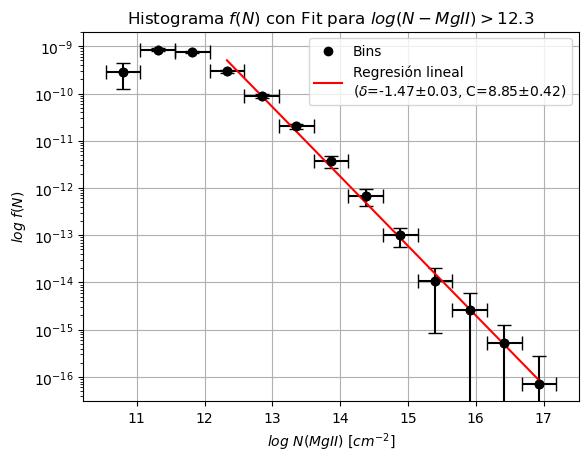

Pendiente (delta): -1.4715798241935467 ± 0.03
Intersección (C): 8.848244838859639 ± 0.42


In [26]:
x_error = bin_err_fit  # Error en x

# Transformar el eje y
y_transformed = hist_fit / 10**bins_centers_fit[:-1]
mask = y_transformed > 0
bins_centers_fit_trimmed = bins_centers_fit[:-1][mask]
log_y = np.log10(y_transformed[mask])
x_error_trimmed = x_error[mask]

# Ajuste lineal con numpy.polyfit
coeffs, cov_matrix = np.polyfit(bins_centers_fit_trimmed, log_y, deg=1, cov=True)

# Extraer pendiente (m) e intersección (b)
m, b = coeffs

# Calcular errores estándar de m y b
m_error, b_error = np.sqrt(np.diag(cov_matrix))

# Graficar los datos y la línea ajustada
x_fit = bins_centers_fit_trimmed
y_fit = m * x_fit + b

plt.scatter(bins_centers[:-1], hist / 10**bins_centers[:-1], label='Bins', color='black')
plt.errorbar(bins_centers[:-1], hist / 10**bins_centers[:-1], xerr=(bin_edges[1:] - bin_edges[:-1]) / 2,
             yerr=bin_err/ 10**bins_centers[:-1] , fmt='o', color='black', capsize=5)

plt.plot(x_fit, 10**y_fit, color='red', label=f"Regresión lineal\n($\delta$={m:.2f}±{m_error:.2f}, C={b:.2f}±{b_error:.2f})")
plt.yscale('log')
plt.ylabel(r'$log \ f(N)$')
plt.xlabel(r'$log \ N(MgII) \ [cm^{-2}]$')
plt.title('Histograma $f(N)$ con Fit para $log(N-MgII)>12.3$')
plt.legend()
plt.grid()
plt.show()

# Mostrar resultados
print(f"Pendiente (delta): {m} ± {m_error:.2f}")
print(f"Intersección (C): {b} ± {b_error:.2f}")


In [27]:
z_abs = df['zabs']

In [28]:
df['lambda_abs'] = (1+z_abs)*2796.3543

In [29]:
df.head()

,QSO,zabs,Ncld,vcld,N-MgII,e_NMgII,bMgII,e_b-MgII,N-FeII,e_N-FeII,...,N-MnII,e_N-MnII,b-MnII,e_b-MnII,N-CaII,e_N-CaII,b-CaII,e_b-CaII,bin,lambda_abs
0,J000149-015939,0.870821,1,-93.01,13.10,0.035,5.76,0.185,13.32,0.023,...,11.19,-1.0,0.0,0.0,11.14,-1.0,0.0,0.0,5.0,5231.478348
1,J000149-015939,0.870821,2,-52.58,12.59,0.241,7.99,2.502,12.53,0.237,...,11.27,-1.0,0.0,0.0,11.25,-1.0,0.0,0.0,4.0,5231.478348
2,J000149-015939,0.870821,3,-46.49,13.03,0.190,3.18,0.435,12.93,0.096,...,11.08,-1.0,0.0,0.0,11.09,-1.0,0.0,0.0,4.0,5231.478348
3,J000149-015939,0.870821,4,-32.94,12.45,0.244,5.81,1.691,12.41,0.090,...,11.19,-1.0,0.0,0.0,11.21,-1.0,0.0,0.0,3.0,5231.478348
4,J000149-015939,0.870821,5,-23.87,12.51,0.373,17.61,9.999,11.47,-1.000,...,11.43,-1.0,0.0,0.0,11.41,-1.0,0.0,0.0,3.0,5231.478348


In [30]:
df.head()

,QSO,zabs,Ncld,vcld,N-MgII,e_NMgII,bMgII,e_b-MgII,N-FeII,e_N-FeII,...,N-MnII,e_N-MnII,b-MnII,e_b-MnII,N-CaII,e_N-CaII,b-CaII,e_b-CaII,bin,lambda_abs
0,J000149-015939,0.870821,1,-93.01,13.10,0.035,5.76,0.185,13.32,0.023,...,11.19,-1.0,0.0,0.0,11.14,-1.0,0.0,0.0,5.0,5231.478348
1,J000149-015939,0.870821,2,-52.58,12.59,0.241,7.99,2.502,12.53,0.237,...,11.27,-1.0,0.0,0.0,11.25,-1.0,0.0,0.0,4.0,5231.478348
2,J000149-015939,0.870821,3,-46.49,13.03,0.190,3.18,0.435,12.93,0.096,...,11.08,-1.0,0.0,0.0,11.09,-1.0,0.0,0.0,4.0,5231.478348
3,J000149-015939,0.870821,4,-32.94,12.45,0.244,5.81,1.691,12.41,0.090,...,11.19,-1.0,0.0,0.0,11.21,-1.0,0.0,0.0,3.0,5231.478348
4,J000149-015939,0.870821,5,-23.87,12.51,0.373,17.61,9.999,11.47,-1.000,...,11.43,-1.0,0.0,0.0,11.41,-1.0,0.0,0.0,3.0,5231.478348


In [31]:
merge = df.merge(zs[['QSO', 'zem']], on='QSO', how='left')

In [32]:
merge.head()

,QSO,zabs,Ncld,vcld,N-MgII,e_NMgII,bMgII,e_b-MgII,N-FeII,e_N-FeII,...,e_N-MnII,b-MnII,e_b-MnII,N-CaII,e_N-CaII,b-CaII,e_b-CaII,bin,lambda_abs,zem
0,J000149-015939,0.870821,1,-93.01,13.10,0.035,5.76,0.185,13.32,0.023,...,-1.0,0.0,0.0,11.14,-1.0,0.0,0.0,5.0,5231.478348,2.817
1,J000149-015939,0.870821,2,-52.58,12.59,0.241,7.99,2.502,12.53,0.237,...,-1.0,0.0,0.0,11.25,-1.0,0.0,0.0,4.0,5231.478348,2.817
2,J000149-015939,0.870821,3,-46.49,13.03,0.190,3.18,0.435,12.93,0.096,...,-1.0,0.0,0.0,11.09,-1.0,0.0,0.0,4.0,5231.478348,2.817
3,J000149-015939,0.870821,4,-32.94,12.45,0.244,5.81,1.691,12.41,0.090,...,-1.0,0.0,0.0,11.21,-1.0,0.0,0.0,3.0,5231.478348,2.817
4,J000149-015939,0.870821,5,-23.87,12.51,0.373,17.61,9.999,11.47,-1.000,...,-1.0,0.0,0.0,11.41,-1.0,0.0,0.0,3.0,5231.478348,2.817


In [33]:
merge['lambda_obs'] = merge['lambda_abs']/(1+merge['zem'])

In [34]:
merge.head()

,QSO,zabs,Ncld,vcld,N-MgII,e_NMgII,bMgII,e_b-MgII,N-FeII,e_N-FeII,...,b-MnII,e_b-MnII,N-CaII,e_N-CaII,b-CaII,e_b-CaII,bin,lambda_abs,zem,lambda_obs
0,J000149-015939,0.870821,1,-93.01,13.10,0.035,5.76,0.185,13.32,0.023,...,0.0,0.0,11.14,-1.0,0.0,0.0,5.0,5231.478348,2.817,1370.573316
1,J000149-015939,0.870821,2,-52.58,12.59,0.241,7.99,2.502,12.53,0.237,...,0.0,0.0,11.25,-1.0,0.0,0.0,4.0,5231.478348,2.817,1370.573316
2,J000149-015939,0.870821,3,-46.49,13.03,0.190,3.18,0.435,12.93,0.096,...,0.0,0.0,11.09,-1.0,0.0,0.0,4.0,5231.478348,2.817,1370.573316
3,J000149-015939,0.870821,4,-32.94,12.45,0.244,5.81,1.691,12.41,0.090,...,0.0,0.0,11.21,-1.0,0.0,0.0,3.0,5231.478348,2.817,1370.573316
4,J000149-015939,0.870821,5,-23.87,12.51,0.373,17.61,9.999,11.47,-1.000,...,0.0,0.0,11.41,-1.0,0.0,0.0,3.0,5231.478348,2.817,1370.573316


In [35]:
merge.to_csv('data.csv')

In [36]:
em_NV = 1240.81
em_CIV = 1549.48
em_MgII = 2799.117
em_OI = 1305.53
em_CII = 1335.31
em_SiIV_OIV = 1399.8
em_HeII = 1640.4

em_CIII = 1908.734


In [37]:
em_lines = pd.DataFrame(columns=["species", "lambda_vac"])

In [38]:
em_lines.loc[0] = ['NV', em_NV]
em_lines.loc[1] = ['CIV', em_CIV]
em_lines.loc[2] = ['MgII', em_MgII]
em_lines.loc[3] = ['OI', em_OI]
em_lines.loc[4] = ['CII', em_CII]
em_lines.loc[5] = ['SiIV+OIV', em_SiIV_OIV]
em_lines.loc[6] = ['HeII', em_HeII]
em_lines.loc[7] = ['CIII', em_CIII]



In [39]:
def asignar_especie_por_lambda(df_obs, df_vac):
    """
    Asigna la especie del dataframe df_vac al dataframe df_obs 
    en función del valor más cercano de lambda_vac a lambda_obs.

    Args:
    - df_obs: DataFrame que contiene la columna 'lambda_obs'.
    - df_vac: DataFrame que contiene las columnas 'lambda_vac' y 'species'.

    Returns:
    - Un nuevo DataFrame con los datos de df_obs y una nueva columna 'species'.
    """
    # Asegurarse de que no hay valores NaN
    df_obs = df_obs.dropna(subset=['lambda_obs']).reset_index(drop=True)
    df_vac = df_vac.dropna(subset=['lambda_vac', 'species']).reset_index(drop=True)

    # Lista para almacenar las especies asignadas
    especies_asignadas = []
    
    for lambda_obs in df_obs['lambda_obs']:
        # Calcular las diferencias absolutas con todos los valores de lambda_vac
        diferencias = np.abs(df_vac['lambda_vac'] - lambda_obs)
        
        # Asegurar que diferencias no esté vacío
        if not diferencias.empty:
            indice_cercano = diferencias.idxmin()
            especie = df_vac.loc[indice_cercano, 'species']
        else:
            especie = None
        
        especies_asignadas.append(especie)
    
    # Crear una copia del DataFrame original y agregar la columna 'species'
    df_resultado = df_obs.copy()
    df_resultado['closest_species'] = especies_asignadas
    
    return df_resultado


In [40]:
df_resultado = asignar_especie_por_lambda(merge, em_lines)

In [41]:
df_resultado.to_csv('species.csv')

In [42]:
def filtrar_por_intervalo(df1, df2, valor):
    """
    Filtra filas del primer DataFrame (df1) dependiendo de si 'lambda_obs' 
    se encuentra dentro de un intervalo definido por 'lambda_vac' en el segundo DataFrame (df2) 
    y el valor proporcionado.

    Args:
    - df1: DataFrame con las columnas 'closest_species' y 'lambda_obs'.
    - df2: DataFrame con las columnas 'species' y 'lambda_vac'.
    - valor: Valor para definir el intervalo alrededor de 'lambda_vac'.

    Returns:
    - df_en_intervalo: DataFrame con las filas de df1 donde 'lambda_obs' está en el intervalo.
    - df_fuera_intervalo: DataFrame con las filas de df1 donde 'lambda_obs' NO está en el intervalo.
    """
    # Crear listas para las filas dentro y fuera del intervalo
    filas_en_intervalo = []
    filas_fuera_intervalo = []

    # Iterar sobre cada fila de df1
    for _, fila1 in df1.iterrows():
        # Obtener los valores de la fila actual de df1
        especie = fila1['closest_species']
        lambda_obs = fila1['lambda_obs']

        # Filtrar df2 por la especie correspondiente
        fila2 = df2[df2['species'] == especie]

        # Verificar si se encontró una fila en df2
        if not fila2.empty:
            lambda_vac = fila2.iloc[0]['lambda_vac']

            # Comprobar si lambda_obs está en el intervalo
            if (lambda_vac - valor) <= lambda_obs <= (lambda_vac + valor):
                filas_en_intervalo.append(fila1)
            else:
                filas_fuera_intervalo.append(fila1)
        else:
            # Si no se encuentra la especie en df2, considerar que está fuera del intervalo
            filas_fuera_intervalo.append(fila1)

    # Crear DataFrames a partir de las listas
    df_en_intervalo = pd.DataFrame(filas_en_intervalo)
    df_fuera_intervalo = pd.DataFrame(filas_fuera_intervalo)

    return df_en_intervalo, df_fuera_intervalo



In [43]:
df_in, df_out = filtrar_por_intervalo(df_resultado,em_lines,10)

In [44]:
df_in.head()

,QSO,zabs,Ncld,vcld,N-MgII,e_NMgII,bMgII,e_b-MgII,N-FeII,e_N-FeII,...,e_b-MnII,N-CaII,e_N-CaII,b-CaII,e_b-CaII,bin,lambda_abs,zem,lambda_obs,closest_species
8,J000323-260318,1.434037,1,-170.48,12.46,0.016,3.72,0.215,11.86,0.061,...,0.0,0.00,0.000,0.00,0.000,3.0,6806.429831,4.111,1331.721744,CII
9,J000323-260318,1.434037,2,-24.25,12.86,0.018,4.46,0.243,12.37,0.022,...,0.0,0.00,0.000,0.00,0.000,4.0,6806.429831,4.111,1331.721744,CII
10,J000323-260318,1.434037,3,-11.79,11.68,0.118,3.60,1.915,10.75,-1.000,...,0.0,0.00,0.000,0.00,0.000,2.0,6806.429831,4.111,1331.721744,CII
11,J000323-260318,1.434037,4,20.44,13.18,0.014,6.66,0.160,12.71,0.013,...,0.0,0.00,0.000,0.00,0.000,5.0,6806.429831,4.111,1331.721744,CII
12,J000344-232355,0.452397,1,-69.73,12.12,0.016,2.47,0.217,0.00,0.000,...,0.0,11.45,0.025,2.47,0.217,3.0,4061.416596,2.280,1238.236767,NV


In [45]:
df_out.head()

,QSO,zabs,Ncld,vcld,N-MgII,e_NMgII,bMgII,e_b-MgII,N-FeII,e_N-FeII,...,e_b-MnII,N-CaII,e_N-CaII,b-CaII,e_b-CaII,bin,lambda_abs,zem,lambda_obs,closest_species
0,J000149-015939,0.870821,1,-93.01,13.10,0.035,5.76,0.185,13.32,0.023,...,0.0,11.14,-1.0,0.0,0.0,5.0,5231.478348,2.817,1370.573316,SiIV+OIV
1,J000149-015939,0.870821,2,-52.58,12.59,0.241,7.99,2.502,12.53,0.237,...,0.0,11.25,-1.0,0.0,0.0,4.0,5231.478348,2.817,1370.573316,SiIV+OIV
2,J000149-015939,0.870821,3,-46.49,13.03,0.190,3.18,0.435,12.93,0.096,...,0.0,11.09,-1.0,0.0,0.0,4.0,5231.478348,2.817,1370.573316,SiIV+OIV
3,J000149-015939,0.870821,4,-32.94,12.45,0.244,5.81,1.691,12.41,0.090,...,0.0,11.21,-1.0,0.0,0.0,3.0,5231.478348,2.817,1370.573316,SiIV+OIV
4,J000149-015939,0.870821,5,-23.87,12.51,0.373,17.61,9.999,11.47,-1.000,...,0.0,11.41,-1.0,0.0,0.0,3.0,5231.478348,2.817,1370.573316,SiIV+OIV


In [46]:
df_in.to_csv('dfin.csv')
df_out.to_csv('dfout.csv')

In [47]:
log_N_MgII_out = df_out['N-MgII']

err_log_N_MgII_out = df_out['e_NMgII']

In [48]:
log_N_MgII_in = df_in['N-MgII']

err_log_N_MgII_in = df_in['e_NMgII']

In [49]:
bins_out = np.linspace(log_N_MgII_out.min(), log_N_MgII_out.max(), 14)
hist_out, bin_edges_out = np.histogram(log_N_MgII_out, bins=bins_out)

In [50]:
bins_in = np.linspace(log_N_MgII_in.min(), log_N_MgII_in.max(), 14)
hist_in, bin_edges_in = np.histogram(log_N_MgII_in, bins=bins_in)

In [51]:
bins_centers_out = bin_edges_out + np.abs((bin_edges_out[0]-bin_edges_out[1])/2)


In [52]:
bins_centers_in = bin_edges_in + np.abs((bin_edges_in[0]-bin_edges_in[1])/2)

In [53]:
df_out['bin'] = pd.cut(df_out['N-MgII'], bins = bins_out, labels = False)

In [54]:
df_in['bin'] = pd.cut(df_in['N-MgII'], bins = bins_in, labels = False)

In [55]:
bin_err_out = df_out.groupby('bin')['e_NMgII'].apply(lambda x: np.sqrt(np.sum(x**2)))

In [56]:
bin_err_in = df_in.groupby('bin')['e_NMgII'].apply(lambda x: np.sqrt(np.sum(x**2)))

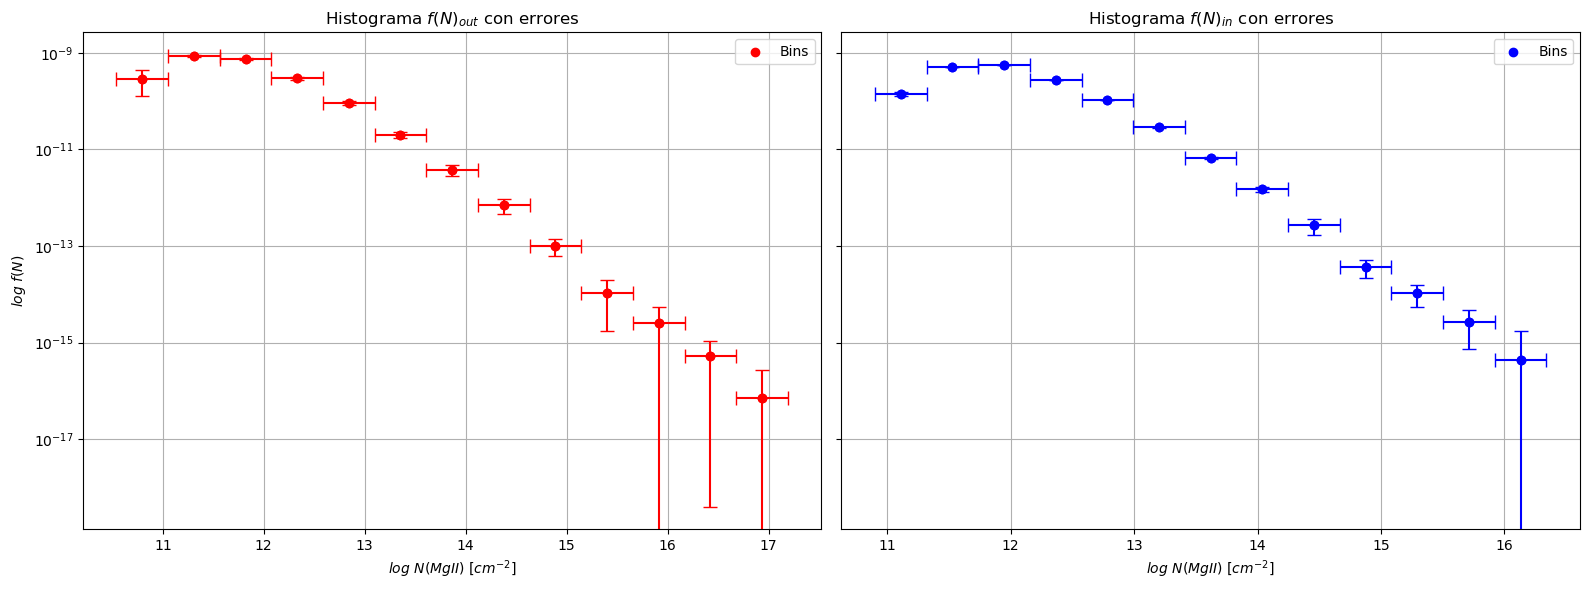

In [57]:
# Crear una figura con dos subplots, uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Primer subplot: Histograma f(N)_{out}
axs[0].scatter(bins_centers_out[:-1], hist / 10**bins_centers_out[:-1], label='Bins', color='red')
axs[0].errorbar(bins_centers_out[:-1], hist / 10**bins_centers_out[:-1], 
                xerr=(bin_edges_out[1:] - bin_edges_out[:-1]) / 2,
                yerr=bin_err_out / 10**bins_centers_out[:-1], fmt='o', color='red', capsize=5)
axs[0].set_yscale('log')
axs[0].set_ylabel(r'$log \ f(N)$')
axs[0].set_xlabel(r'$log \ N(MgII) \ [cm^{-2}]$')
axs[0].set_title('Histograma $f(N)_{out}$ con errores')
axs[0].legend()
axs[0].grid()

# Segundo subplot: Histograma f(N)_{in}
axs[1].scatter(bins_centers_in[:-1], hist / 10**bins_centers_in[:-1], label='Bins', color='blue')
axs[1].errorbar(bins_centers_in[:-1], hist / 10**bins_centers_in[:-1], 
                xerr=(bin_edges_in[1:] - bin_edges_in[:-1]) / 2,
                yerr=bin_err_in / 10**bins_centers_in[:-1], fmt='o', color='blue', capsize=5)
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$log \ N(MgII) \ [cm^{-2}]$')
axs[1].set_title('Histograma $f(N)_{in}$ con errores')
axs[1].legend()
axs[1].grid()

# Ajustar espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [58]:
vp_fit_in = df_in[df_in['N-MgII']>12.4]

In [59]:
vp_fit_out = df_out[df_out['N-MgII']>12.4]

In [60]:
x_min_out = 10**vp_fit_out['N-MgII'].min()

vp_out = 10**vp_fit_out['N-MgII']

n=len(vp_out)

In [61]:
x_min_in = 10**vp_fit_in['N-MgII'].min()

vp_in = 10**vp_fit_in['N-MgII']

n=len(vp_in)

In [62]:
delta_out = 1 + n / np.sum(np.log(vp_out / x_min_out))

print(delta_out)

1.0714640500218824


In [63]:
delta_in = 1 + n / np.sum(np.log(vp_in / x_min_in))

print(delta_in)

1.4527542698959195


In [64]:
C_out = (delta_out - 1) * (x_min_out ** (delta_out - 1))
print(C_out)

0.5507525108359917


In [65]:
C_in = (delta_in - 1) * (x_min_in ** (delta_in - 1))
print(C_in)

188166.81947027723


In [66]:
logN_out = 10**vp_fit_out['N-MgII']
e_N_out = np.log(10)*logN_out*vp_fit_out['e_NMgII']

N_min_out = logN_out.min()
N_unc_out = unumpy.uarray(logN_out, e_N_out)

# Calcular logaritmos y delta
log_ratios_with_unc_out = unumpy.log(N_unc_out / N_min_out)
delta_with_unc_out = 1 + len(N_unc_out) / log_ratios_with_unc_out.sum()

# Extraer valor nominal y error
delta_nominal_out = unumpy.nominal_values(delta_with_unc_out)
delta_std_dev_out = unumpy.std_devs(delta_with_unc_out)

print(delta_nominal_out)
print(delta_std_dev_out)

1.4530655217603503
0.0404114202359331


In [67]:
logN_in = 10**vp_fit_in['N-MgII']
e_N_in = np.log(10)*logN_in*vp_fit_in['e_NMgII']

N_min_in = logN_in.min()
N_unc_in = unumpy.uarray(logN_in, e_N_in)

# Calcular logaritmos y delta
log_ratios_with_unc_in = unumpy.log(N_unc_in / N_min_in)
delta_with_unc_in = 1 + len(N_unc_in) / log_ratios_with_unc_in.sum()

# Extraer valor nominal y error
delta_nominal_in = unumpy.nominal_values(delta_with_unc_in)
delta_std_dev_in = unumpy.std_devs(delta_with_unc_in)

print(delta_nominal_in)
print(delta_std_dev_in)

1.4527542698959188
0.08290612111880893


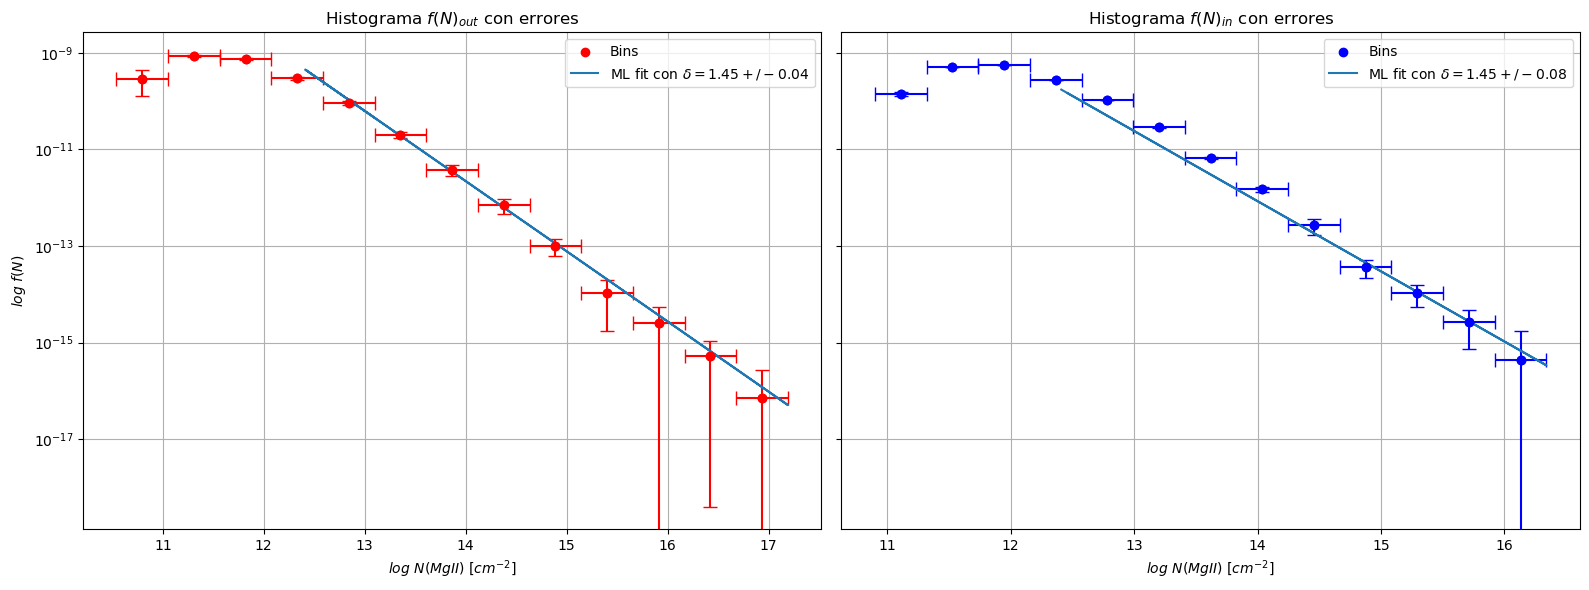

In [68]:
# Crear una figura con dos subplots, uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Primer subplot: Histograma f(N)_{out}
axs[0].scatter(bins_centers_out[:-1], hist / 10**bins_centers_out[:-1], label='Bins', color='red')
axs[0].errorbar(bins_centers_out[:-1], hist / 10**bins_centers_out[:-1], 
                xerr=(bin_edges_out[1:] - bin_edges_out[:-1]) / 2,
                yerr=bin_err_out / 10**bins_centers_out[:-1], fmt='o', color='red', capsize=5)
axs[0].plot(vp_fit_out['N-MgII'], (9.85*10**8-5*10**8)*(10**(vp_fit_out['N-MgII']))**(-delta_nominal_out), label = fr'ML fit con $\delta={delta_with_unc_out:.2f}$')
axs[0].set_yscale('log')
axs[0].set_ylabel(r'$log \ f(N)$')
axs[0].set_xlabel(r'$log \ N(MgII) \ [cm^{-2}]$')
axs[0].set_title('Histograma $f(N)_{out}$ con errores')
axs[0].legend()
axs[0].grid()

# Segundo subplot: Histograma f(N)_{in}
axs[1].scatter(bins_centers_in[:-1], hist / 10**bins_centers_in[:-1], label='Bins', color='blue')
axs[1].errorbar(bins_centers_in[:-1], hist / 10**bins_centers_in[:-1], 
                xerr=(bin_edges_in[1:] - bin_edges_in[:-1]) / 2,
                yerr=bin_err_in / 10**bins_centers_in[:-1], fmt='o', color='blue', capsize=5)
axs[1].plot(vp_fit_in['N-MgII'], (9.85*10**8-8*10**8)*(10**(vp_fit_in['N-MgII']))**(-delta_nominal_in), label = fr'ML fit con $\delta={delta_with_unc_in:.2f}$')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$log \ N(MgII) \ [cm^{-2}]$')
axs[1].set_title('Histograma $f(N)_{in}$ con errores')
axs[1].legend()
axs[1].grid()

# Ajustar espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<>:33: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Agustín\AppData\Local\Temp\ipykernel_8968\3972909286.py:33: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(x_fit_out, 10**y_fit_out, color='black', label=f"Regresión lineal\n($\delta$={m_out:.2f}±{m_error_out:.2f}, C={b_out:.2f}±{b_error_out:.2f})")
C:\Users\Agustín\AppData\Local\Temp\ipykernel_8968\3972909286.py:5: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  bin_err_fit_out = bin_err_out[3:]


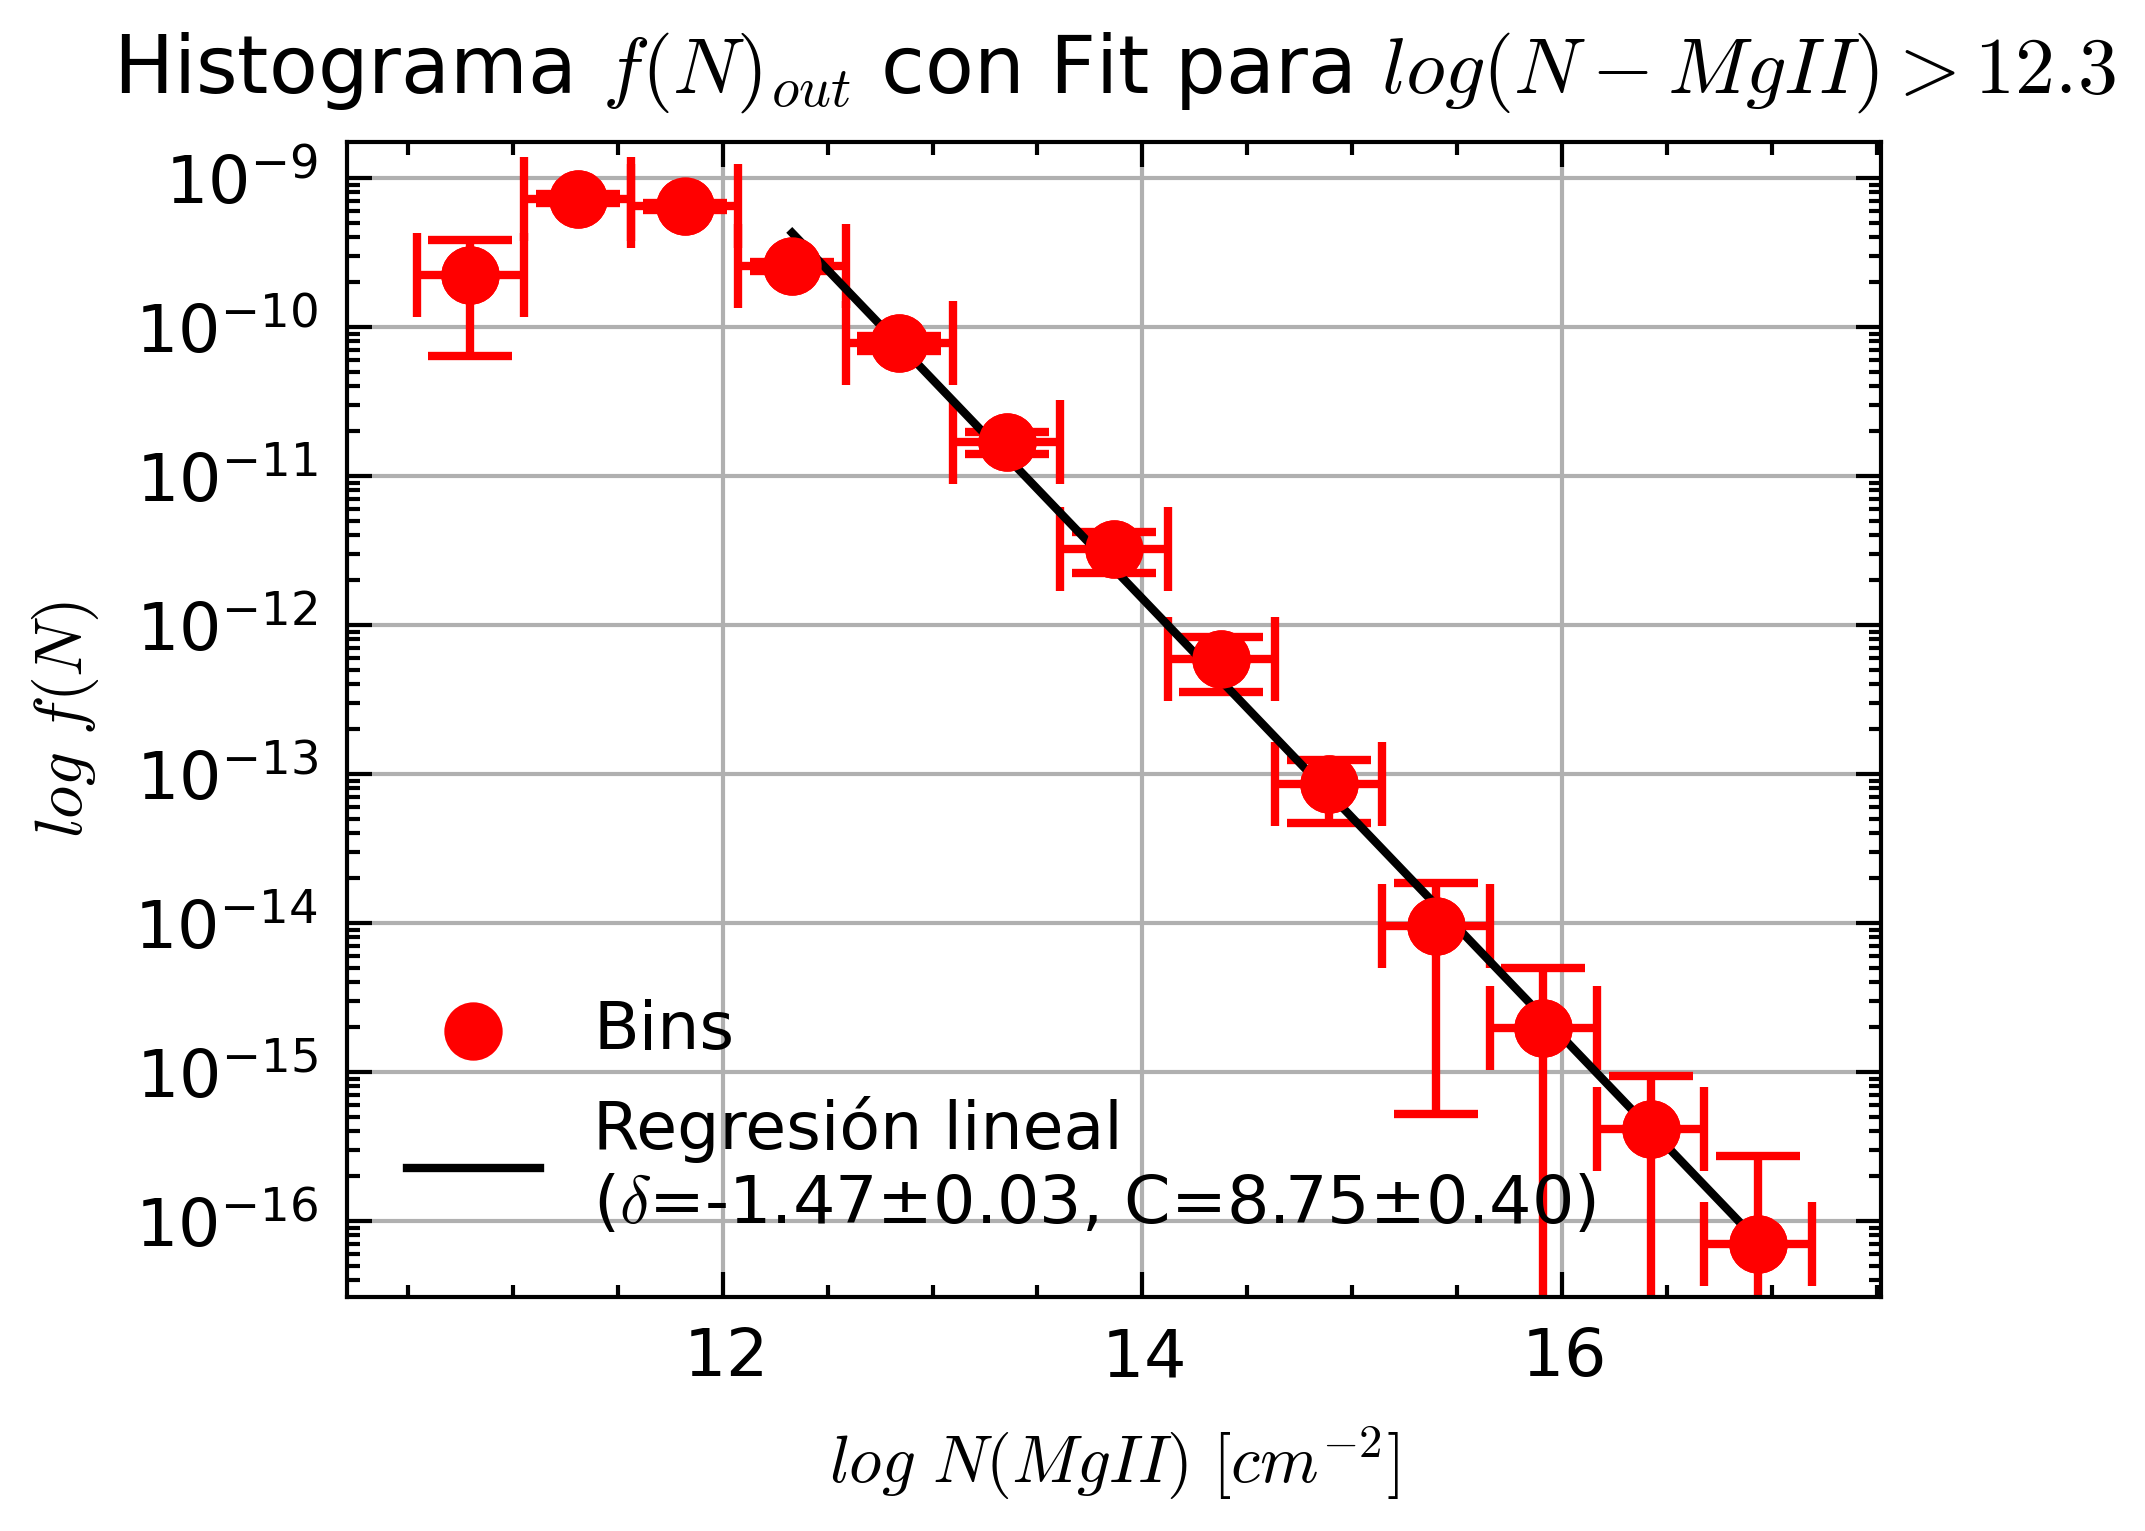

Pendiente (delta): -1.4715798241935467 ± 0.03
Intersección (C): 8.848244838859639 ± 0.42


In [122]:
bins_centers_fit_out = bins_centers_out[3:]

hist_fit_out = hist_out[3:]

bin_err_fit_out = bin_err_out[3:]

x_error_out = bin_err_fit_out  # Error en x

# Transformar el eje y
y_transformed_out = hist_fit_out / 10**bins_centers_fit_out[:-1]
mask_out = y_transformed_out > 0
bins_centers_fit_trimmed_out = bins_centers_fit_out[:-1][mask_out]
log_y_out = np.log10(y_transformed_out[mask_out])
x_error_trimmed_out = x_error_out[mask_out]

# Ajuste lineal con numpy.polyfit
coeffs_out, cov_matrix_out = np.polyfit(bins_centers_fit_trimmed_out, log_y_out, deg=1, cov=True)

# Extraer pendiente (m) e intersección (b)
m_out, b_out = coeffs_out

# Calcular errores estándar de m y b
m_error_out, b_error_out = np.sqrt(np.diag(cov_matrix_out))

# Graficar los datos y la línea ajustada
x_fit_out = bins_centers_fit_trimmed_out
y_fit_out = m_out * x_fit_out + b_out

plt.scatter(bins_centers_out[:-1], hist_out / 10**bins_centers_out[:-1], label='Bins', color='red')
plt.errorbar(bins_centers_out[:-1], hist_out / 10**bins_centers_out[:-1], xerr=(bin_edges_out[1:] - bin_edges_out[:-1]) / 2,
             yerr=bin_err_out/ 10**bins_centers_out[:-1] , fmt='o', color='red', capsize=5)

plt.plot(x_fit_out, 10**y_fit_out, color='black', label=f"Regresión lineal\n($\delta$={m_out:.2f}±{m_error_out:.2f}, C={b_out:.2f}±{b_error_out:.2f})")
plt.yscale('log')
plt.ylabel(r'$log \ f(N)$')
plt.xlabel(r'$log \ N(MgII) \ [cm^{-2}]$')
plt.title('Histograma $f(N)_{out}$ con Fit para $log(N-MgII)>12.3$')
plt.legend()
plt.grid()
plt.show()

# Mostrar resultados
print(f"Pendiente (delta): {m} ± {m_error:.2f}")
print(f"Intersección (C): {b} ± {b_error:.2f}")

<>:33: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Agustín\AppData\Local\Temp\ipykernel_8968\3661238460.py:33: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(x_fit_in, 10**y_fit_in, color='black', label=f"Regresión lineal\n($\delta$={m_in:.2f}±{m_error_in:.2f}, C={b_in:.2f}±{b_error_out:.2f})")
C:\Users\Agustín\AppData\Local\Temp\ipykernel_8968\3661238460.py:5: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  bin_err_fit_in = bin_err_in[3:]


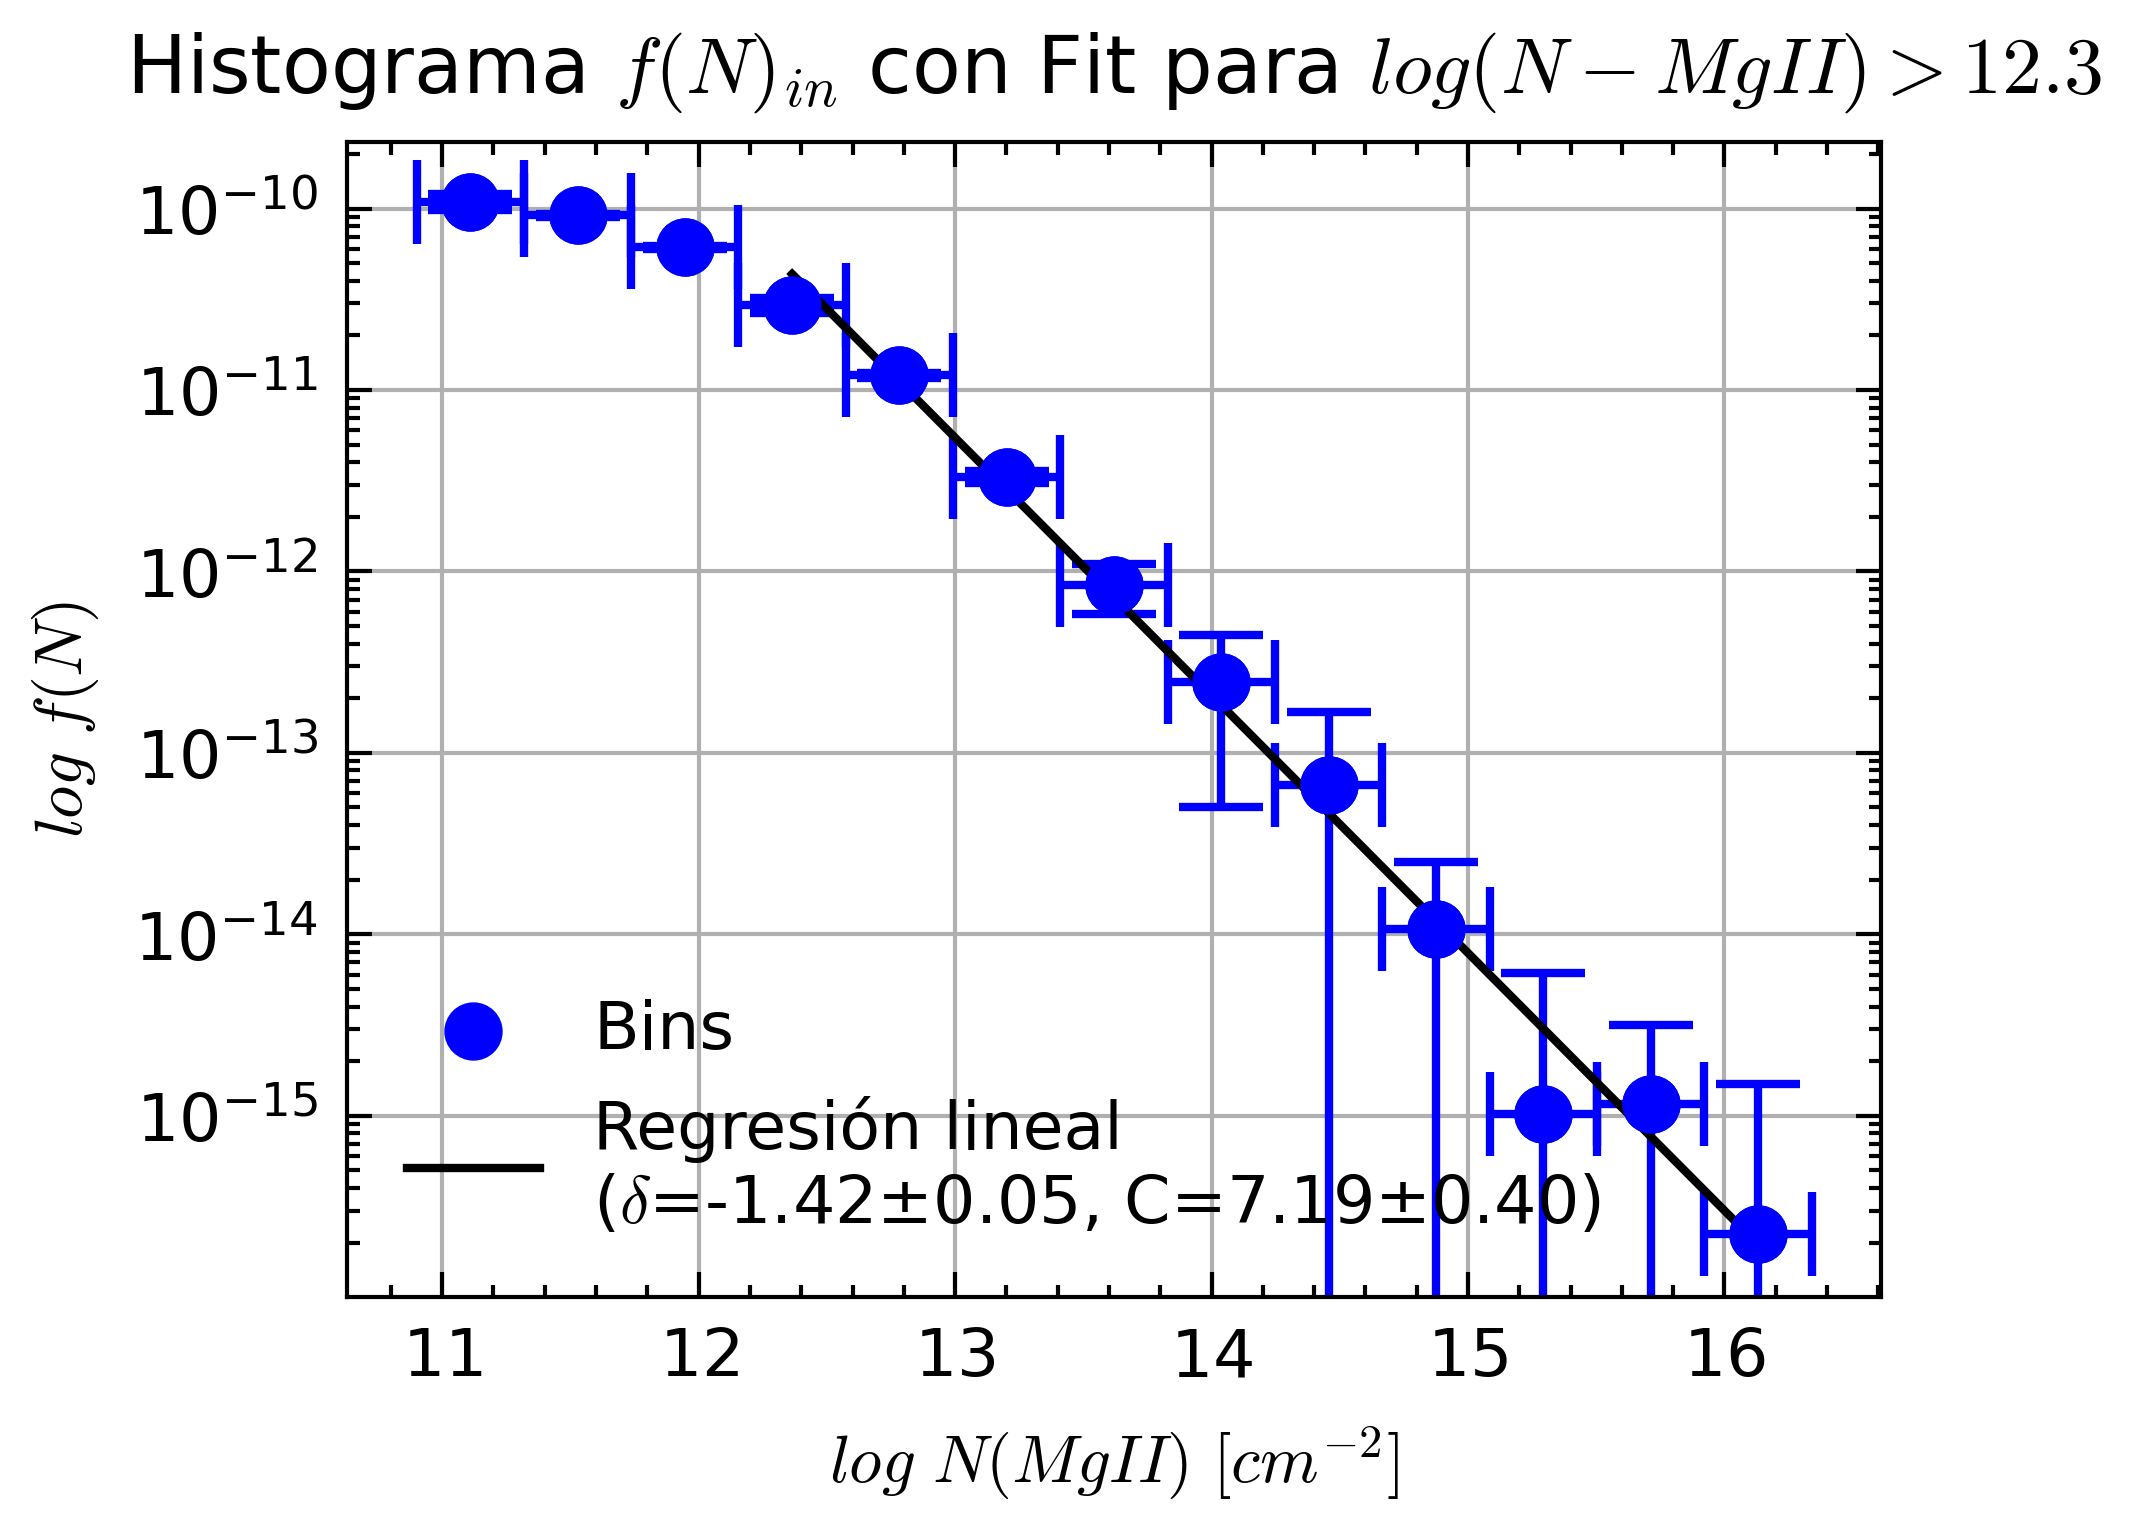

Pendiente (delta): -1.4715798241935467 ± 0.03
Intersección (C): 8.848244838859639 ± 0.42


In [121]:
bins_centers_fit_in = bins_centers_in[3:]

hist_fit_in = hist_in[3:]

bin_err_fit_in = bin_err_in[3:]

x_error_in = bin_err_fit_in  # Error en x

# Transformar el eje y
y_transformed_in = hist_fit_in / 10**bins_centers_fit_in[:-1]
mask_in = y_transformed_in > 0
bins_centers_fit_trimmed_in = bins_centers_fit_in[:-1][mask_in]
log_y_in = np.log10(y_transformed_in[mask_in])
x_error_trimmed_in = x_error_in[mask_in]

# Ajuste lineal con numpy.polyfit
coeffs_in, cov_matrix_in = np.polyfit(bins_centers_fit_trimmed_in, log_y_in, deg=1, cov=True)

# Extraer pendiente (m) e intersección (b)
m_in, b_in = coeffs_in

# Calcular errores estándar de m y b
m_error_in, b_error_in = np.sqrt(np.diag(cov_matrix_in))

# Graficar los datos y la línea ajustada
x_fit_in = bins_centers_fit_trimmed_in
y_fit_in = m_in * x_fit_in + b_in

plt.scatter(bins_centers_in[:-1], hist_in / 10**bins_centers_in[:-1], label='Bins', color='blue')
plt.errorbar(bins_centers_in[:-1], hist_in / 10**bins_centers_in[:-1], xerr=(bin_edges_in[1:] - bin_edges_in[:-1]) / 2,
             yerr=bin_err_in/ 10**bins_centers_in[:-1] , fmt='o', color='blue', capsize=5)

plt.plot(x_fit_in, 10**y_fit_in, color='black', label=f"Regresión lineal\n($\delta$={m_in:.2f}±{m_error_in:.2f}, C={b_in:.2f}±{b_error_out:.2f})")
plt.yscale('log')
plt.ylabel(r'$log \ f(N)$')
plt.xlabel(r'$log \ N(MgII) \ [cm^{-2}]$')
plt.title('Histograma $f(N)_{in}$ con Fit para $log(N-MgII)>12.3$')
plt.legend()
plt.grid()
plt.show()

# Mostrar resultados
print(f"Pendiente (delta): {m} ± {m_error:.2f}")
print(f"Intersección (C): {b} ± {b_error:.2f}")

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Agustín\AppData\Local\Temp\ipykernel_8968\3821653118.py:9: SyntaxWarning: invalid escape sequence '\d'
  axs[0].plot(x_fit_out, 10**y_fit_out, color='red', label=f"Regresión lineal\n($\delta$={m_out:.2f}±{m_error_out:.2f}, C={b_out:.2f}±{b_error_out:.2f})")
C:\Users\Agustín\AppData\Local\Temp\ipykernel_8968\3821653118.py:22: SyntaxWarning: invalid escape sequence '\d'
  axs[1].plot(x_fit_in, 10**y_fit_in, color='red', label=f"Regresión lineal\n($\delta$={m_in:.2f}±{m_error_in:.2f}, C={b_in:.2f}±{b_error_out:.2f})")


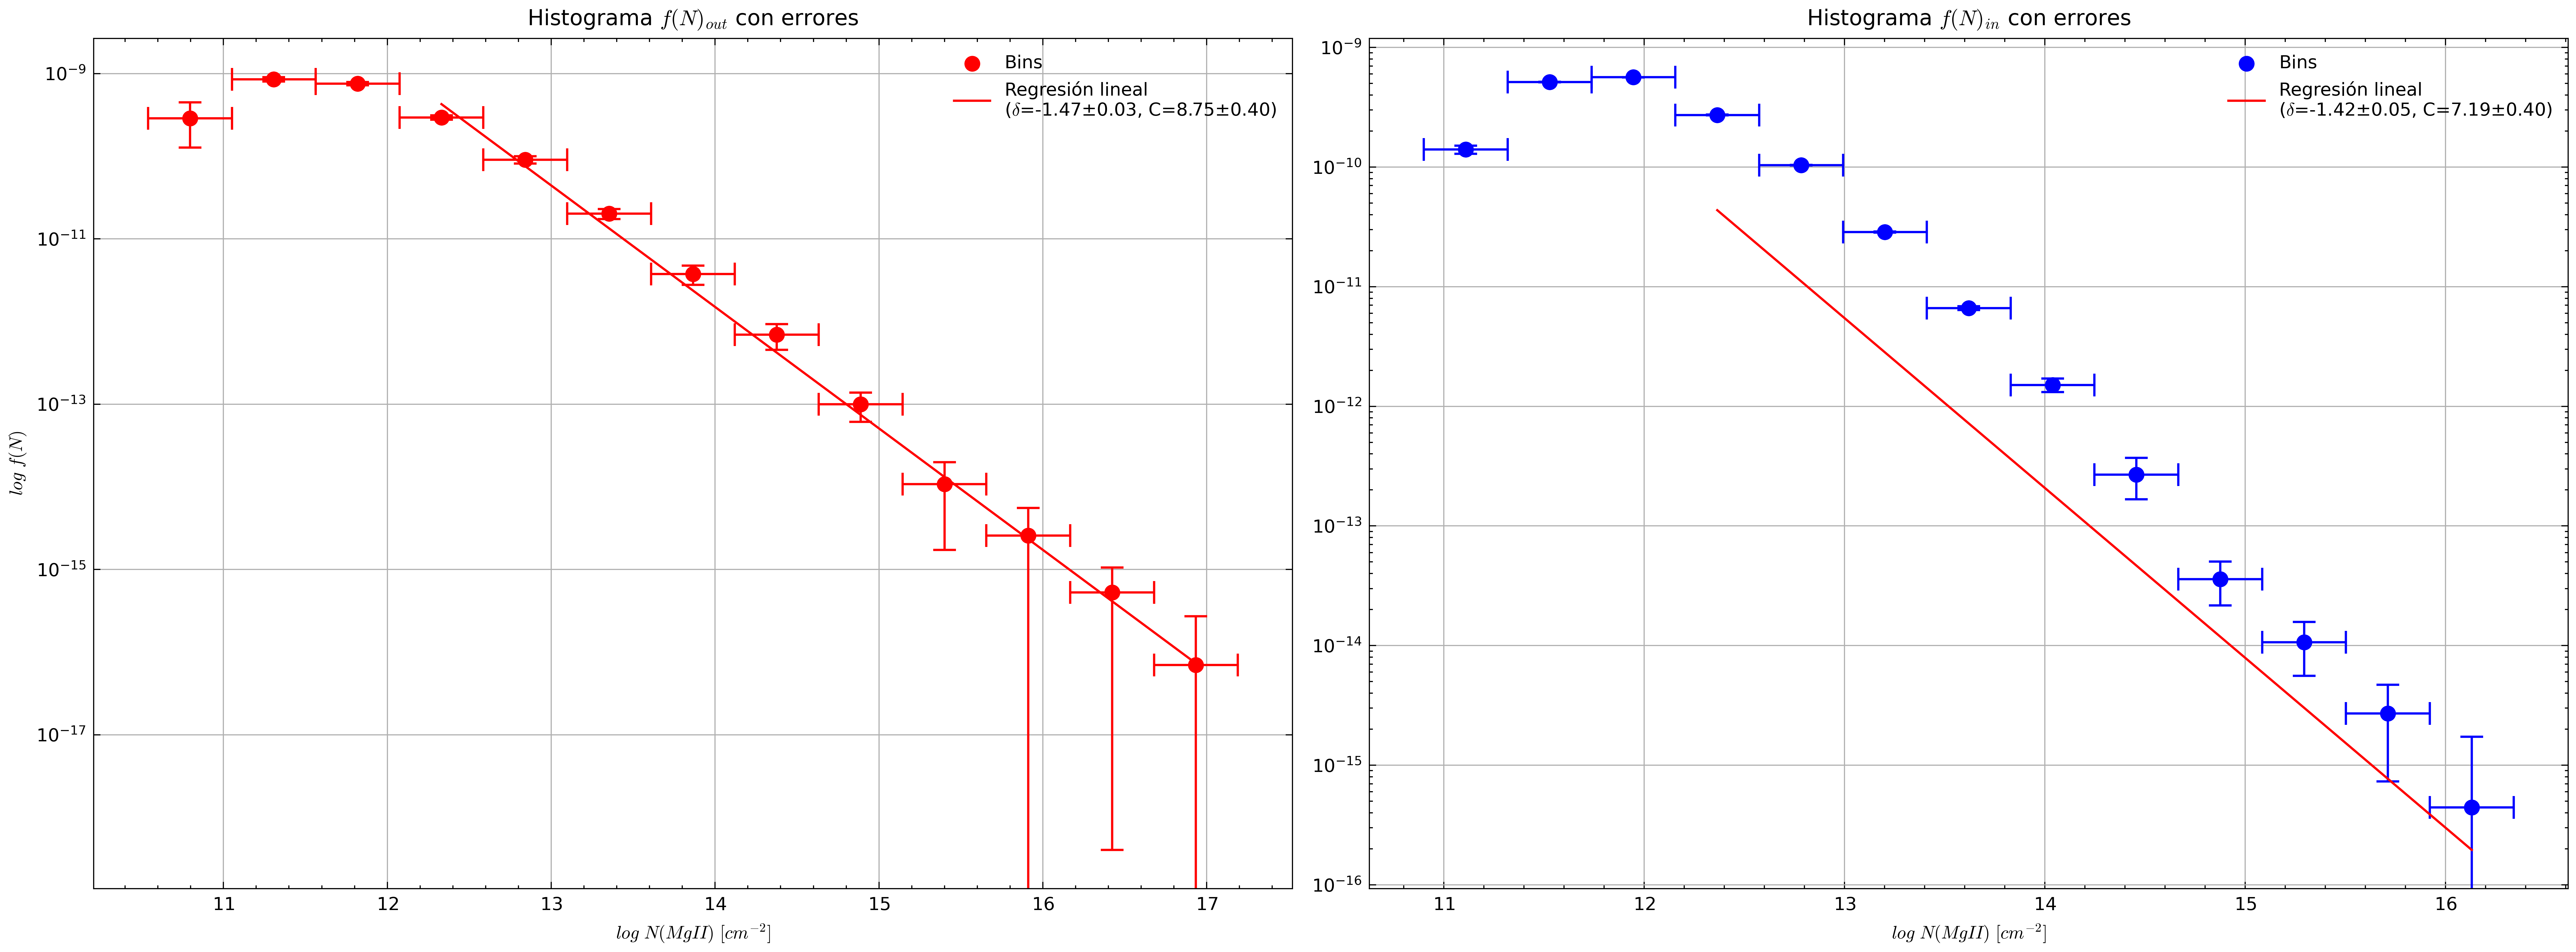

In [115]:
# Crear una figura con dos subplots, uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Primer subplot: Histograma f(N)_{out}
axs[0].scatter(bins_centers_out[:-1], hist / 10**bins_centers_out[:-1], label='Bins', color='red')
axs[0].errorbar(bins_centers_out[:-1], hist / 10**bins_centers_out[:-1], 
                xerr=(bin_edges_out[1:] - bin_edges_out[:-1]) / 2,
                yerr=bin_err_out/ 10**bins_centers_out[:-1], fmt='o', color='red', capsize=5)
axs[0].plot(x_fit_out, 10**y_fit_out, color='red', label=f"Regresión lineal\n($\delta$={m_out:.2f}±{m_error_out:.2f}, C={b_out:.2f}±{b_error_out:.2f})")
axs[0].set_yscale('log')
axs[0].set_ylabel(r'$log \ f(N)$')
axs[0].set_xlabel(r'$log \ N(MgII) \ [cm^{-2}]$')
axs[0].set_title('Histograma $f(N)_{out}$ con errores')
axs[0].legend()
axs[0].grid()

# Segundo subplot: Histograma f(N)_{in}
axs[1].scatter(bins_centers_in[:-1], hist / 10**bins_centers_in[:-1], label='Bins', color='blue')
axs[1].errorbar(bins_centers_in[:-1], hist / 10**bins_centers_in[:-1], 
                xerr=(bin_edges_in[1:] - bin_edges_in[:-1]) / 2,
                yerr=bin_err_in / 10**bins_centers_in[:-1], fmt='o', color='blue', capsize=5)
axs[1].plot(x_fit_in, 10**y_fit_in, color='red', label=f"Regresión lineal\n($\delta$={m_in:.2f}±{m_error_in:.2f}, C={b_in:.2f}±{b_error_out:.2f})")
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$log \ N(MgII) \ [cm^{-2}]$')
axs[1].set_title('Histograma $f(N)_{in}$ con errores')
axs[1].legend()
axs[1].grid()

# Ajustar espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Agustín\AppData\Local\Temp\ipykernel_8968\1256376654.py:5: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(x_fit_in, 10**(m_in*x_fit_in+(b_out+b_in)/2), color='red', label=f"Regresión lineal\n($\delta$={m_in:.2f}±{m_error_in:.2f}, C={b_in:.2f}±{b_error_out:.2f})")


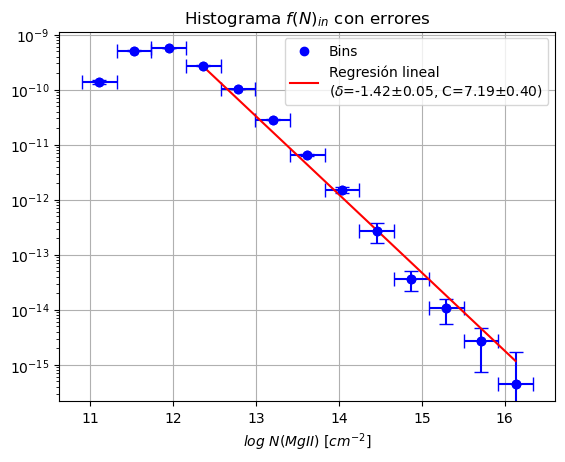

In [72]:
plt.scatter(bins_centers_in[:-1], hist / 10**bins_centers_in[:-1], label='Bins', color='blue')
plt.errorbar(bins_centers_in[:-1], hist / 10**bins_centers_in[:-1], 
                xerr=(bin_edges_in[1:] - bin_edges_in[:-1]) / 2,
                yerr=bin_err_in / 10**bins_centers_in[:-1], fmt='o', color='blue', capsize=5)
plt.plot(x_fit_in, 10**(m_in*x_fit_in+(b_out+b_in)/2), color='red', label=f"Regresión lineal\n($\delta$={m_in:.2f}±{m_error_in:.2f}, C={b_in:.2f}±{b_error_out:.2f})")
plt.yscale('log')
plt.xlabel(r'$log \ N(MgII) \ [cm^{-2}]$')
plt.title('Histograma $f(N)_{in}$ con errores')
plt.legend()
plt.grid()
plt.show()

In [73]:
# Constante
c = 299792.458  # km/s

# Calcular diferencias en velocidad
velocities = [[c * (l_obs - l_rest) / l_rest for l_rest in em_lines['lambda_vac']] for l_obs in merge['lambda_obs']]
print(velocities)


[[31352.151834286924, -34614.757527272675, -153000.6149550392, 14936.0762569543, 7917.020194937171, -6259.422331703421, -49312.36574903589, -84525.40490172566], [31352.151834286924, -34614.757527272675, -153000.6149550392, 14936.0762569543, 7917.020194937171, -6259.422331703421, -49312.36574903589, -84525.40490172566], [31352.151834286924, -34614.757527272675, -153000.6149550392, 14936.0762569543, 7917.020194937171, -6259.422331703421, -49312.36574903589, -84525.40490172566], [31352.151834286924, -34614.757527272675, -153000.6149550392, 14936.0762569543, 7917.020194937171, -6259.422331703421, -49312.36574903589, -84525.40490172566], [31352.151834286924, -34614.757527272675, -153000.6149550392, 14936.0762569543, 7917.020194937171, -6259.422331703421, -49312.36574903589, -84525.40490172566], [31352.151834286924, -34614.757527272675, -153000.6149550392, 14936.0762569543, 7917.020194937171, -6259.422331703421, -49312.36574903589, -84525.40490172566], [31352.151834286924, -34614.75752727267

In [74]:
merge2 = df_resultado.merge(em_lines, left_on="closest_species", right_on="species", how="left")


In [75]:
merge2["velocities"] = c * (merge2["lambda_obs"] - merge2["lambda_vac"]) / merge2["lambda_vac"]


In [76]:
# Umbral de velocidad en km/s
velocity_threshold = 500  # Ejemplo: 500 km/s

# Filtrar sistemas dentro del umbral
selected_systems = [
    {"lambda_obs": l_obs, "v_diff": v_diff}
    for l_obs, v_diffs in zip(merge['lambda_obs'], velocities)
    for v_diff in v_diffs
    if abs(v_diff) <= velocity_threshold
]
print(selected_systems)


[{'lambda_obs': 1638.3170267476191, 'v_diff': -380.67524462298223}, {'lambda_obs': 1638.3170267476191, 'v_diff': -380.67524462298223}, {'lambda_obs': 1638.3170267476191, 'v_diff': -380.67524462298223}, {'lambda_obs': 1239.0775492438354, 'v_diff': -418.57792132117737}, {'lambda_obs': 1239.0775492438354, 'v_diff': -418.57792132117737}, {'lambda_obs': 1239.0775492438354, 'v_diff': -418.57792132117737}, {'lambda_obs': 1239.0775492438354, 'v_diff': -418.57792132117737}, {'lambda_obs': 1239.0775492438354, 'v_diff': -418.57792132117737}, {'lambda_obs': 1239.0775492438354, 'v_diff': -418.57792132117737}, {'lambda_obs': 1239.0775492438354, 'v_diff': -418.57792132117737}, {'lambda_obs': 1239.0775492438354, 'v_diff': -418.57792132117737}, {'lambda_obs': 1239.0775492438354, 'v_diff': -418.57792132117737}, {'lambda_obs': 1239.0775492438354, 'v_diff': -418.57792132117737}, {'lambda_obs': 1239.0775492438354, 'v_diff': -418.57792132117737}, {'lambda_obs': 1239.0775492438354, 'v_diff': -418.57792132117

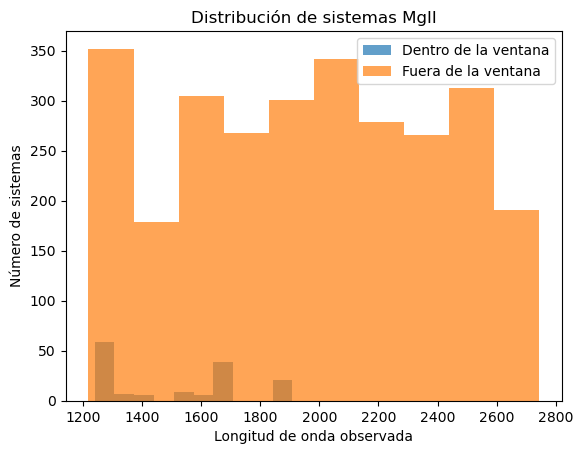

In [77]:
import matplotlib.pyplot as plt

# Dividir los grupos
group1 = [s["lambda_obs"] for s in selected_systems]
group2 = [l for l in merge['lambda_obs'] if l not in group1]

# Graficar
plt.hist(group1, bins=10, alpha=0.7, label="Dentro de la ventana")
plt.hist(group2, bins=10, alpha=0.7, label="Fuera de la ventana")

plt.xlabel("Longitud de onda observada")
plt.ylabel("Número de sistemas")
plt.legend()
plt.title("Distribución de sistemas MgII")
plt.show()


In [78]:
def split_by_velocity(df, threshold):
    """
    Divide un dataframe en dos, según si los valores en la columna 'velocities'
    están dentro o fuera de un intervalo definido por 'threshold'.
    
    Parámetros:
    - df: DataFrame con la columna 'velocities'.
    - threshold: Valor de umbral (en km/s) para definir el intervalo.
    
    Retorna:
    - df_within: DataFrame con objetos dentro del intervalo [-threshold, +threshold].
    - df_outside: DataFrame con objetos fuera del intervalo.
    """
    # Filtrar objetos dentro del intervalo
    df_within = df[(df["velocities"] >= -threshold) & (df["velocities"] <= threshold)]
    
    # Filtrar objetos fuera del intervalo
    df_outside = df[(df["velocities"] < -threshold) | (df["velocities"] > threshold)]
    
    return df_within, df_outside


In [79]:
df_within5, df_outside5 = split_by_velocity(merge2,5*10e3)
len(df_within5)

2708

In [80]:
df_within1, df_outside1 = split_by_velocity(merge2,10e3)

In [81]:
df_within8, df_outside8 = split_by_velocity(merge2, 8*10e3)

C:\Users\Agustín\AppData\Local\Temp\ipykernel_8968\3131731072.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_within5['bin'] = pd.cut(df_within5['N-MgII'], bins = bins_5, labels = False)


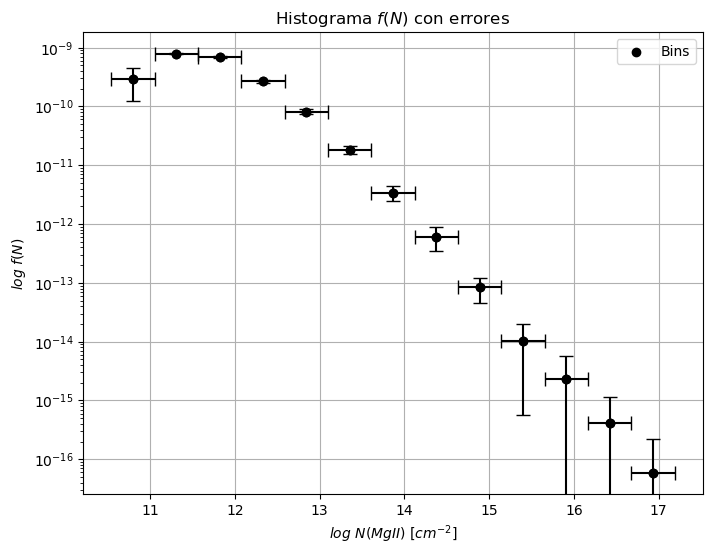

In [82]:
log_N_MgII_5 = df_within5['N-MgII']

err_log_N_MgII_5 = df_within5['e_NMgII']

bins_5 = np.linspace(log_N_MgII_5.min(), log_N_MgII_5.max(), 14)
hist_5, bin_edges_5 = np.histogram(log_N_MgII_5, bins=bins_5)

bins_centers_5 = bin_edges_5 + np.abs((bin_edges_5[0]-bin_edges_5[1])/2)

df_within5['bin'] = pd.cut(df_within5['N-MgII'], bins = bins_5, labels = False)

bin_err_5 = df_within5.groupby('bin')['e_NMgII'].apply(lambda x: np.sqrt(np.sum(x**2)))

plt.figure(figsize=(8, 6))
plt.scatter(bins_centers_5[:-1], hist_5 / 10**bins_centers_5[:-1], label='Bins', color='black')
plt.errorbar(bins_centers_5[:-1], hist_5 / 10**bins_centers_5[:-1], xerr=(bin_edges_5[1:] - bin_edges_5[:-1]) / 2,
             yerr=bin_err_5/ 10**bins_centers_5[:-1] , fmt='o', color='black', capsize=5)

# Configurar ejes y escala logarítmica
plt.yscale('log')
plt.ylabel(r'$log \ f(N)$')
plt.xlabel(r'$log \ N(MgII) \ [cm^{-2}]$')
plt.title('Histograma $f(N)$ con errores')
plt.legend()
plt.grid()
plt.show()

In [83]:
len(df_within1)

1280

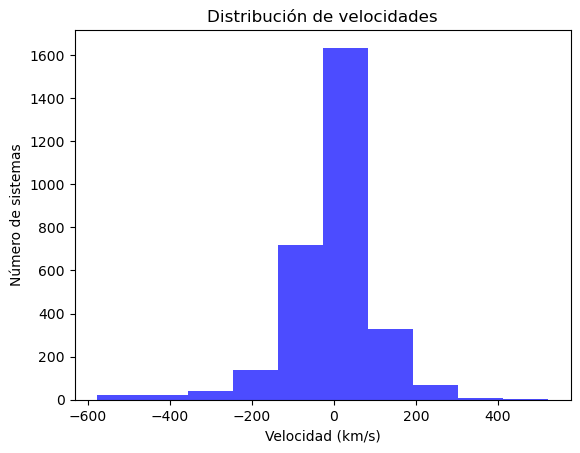

In [84]:
plt.hist(df["vcld"], bins=10, alpha=0.7, color="blue")
plt.xlabel("Velocidad (km/s)")
plt.ylabel("Número de sistemas")
plt.title("Distribución de velocidades")
plt.show()

In [85]:
np.abs(merge2['velocities']).max()

69438.79449209527

![MgII Diagram](mgii_absorber.jpg)

In [86]:
df_outside5['velocities']

29      55248.719562
146     68923.307391
274     59348.670253
275     59348.670253
276     59348.670253
            ...     
2843    65363.307025
2844    65363.307025
2845    65363.307025
2846    65363.307025
2847    65363.307025
Name: velocities, Length: 235, dtype: float64

In [87]:
df_outside5['velocities'].mean()

60808.77682080545

In [89]:
within_dict = {}
outside_dict = {}

# Bucle para iterar a través de las 50 ventanas
for i in range(1, 51):  # Desde ventana 1 hasta ventana 50
    velocity_threshold = np.abs(merge2['velocities']).min()+i*1416.8847995348387  # Calcula la ventana como i * 10^3
    df_within, df_outside = split_by_velocity(merge2, velocity_threshold)
    
    # Almacenar los resultados en los diccionarios
    within_dict[f'window_{i}'] = df_within
    outside_dict[f'window_{i}'] = df_outside

# Ejemplo: acceder a los resultados de una ventana específica
print("Resultados de la ventana 1 (10e2):")
print(within_dict['window_1'])
print(outside_dict['window_1'])

print("Resultados de la ventana 50 (10e5):")
print(within_dict['window_50'])
print(outside_dict['window_50'])

Resultados de la ventana 1 (10e2):
                 QSO      zabs  Ncld    vcld  N-MgII  e_NMgII  bMgII  \
8     J000323-260318  1.434037     1 -170.48   12.46    0.016   3.72   
9     J000323-260318  1.434037     2  -24.25   12.86    0.018   4.46   
10    J000323-260318  1.434037     3  -11.79   11.68    0.118   3.60   
11    J000323-260318  1.434037     4   20.44   13.18    0.014   6.66   
12    J000344-232355  0.452397     1  -69.73   12.12    0.016   2.47   
...              ...       ...   ...     ...     ...      ...    ...   
2850  J230001-341319  0.882589     3   -0.72   13.33    0.030  15.22   
2851  J230001-341319  0.882589     4    9.79   13.61    0.031   3.54   
2852  J230001-341319  0.882589     5   36.00   12.35    0.264   5.93   
2853  J230001-341319  0.882589     6   45.66   12.64    0.139   4.59   
2854  J230001-341319  0.882589     7   58.40   11.85    0.115   4.05   

      e_b-MgII  N-FeII  e_N-FeII  ...  b-CaII  e_b-CaII  bin   lambda_abs  \
8        0.215   11.86 

In [90]:
print(range(1,51))

range(1, 51)


In [91]:
# Función para calcular la pendiente y el error de un DataFrame
def calculate_slope(df):
    log_N_MgII = df['N-MgII']

    err_log_N_MgII = df['e_NMgII']

    bins = np.linspace(log_N_MgII.min(), log_N_MgII.max(), 14)
    hist, bin_edges = np.histogram(log_N_MgII, bins=bins)

    bins_centers = bin_edges + np.abs((bin_edges[0]-bin_edges[1])/2)

    df['bin'] = pd.cut(df['N-MgII'], bins = bins, labels = False)

    bin_err = df.groupby('bin')['e_NMgII'].apply(lambda x: np.sqrt(np.sum(x**2)))
    # Recortar los datos
    bins_centers_fit = bins_centers[3:]

    hist_fit = hist[3:]

    bin_err_fit = bin_err.values[3:]

    x_error = bin_err_fit  # Error en x

    # Transformar el eje y
    y_transformed = hist_fit / 10**bins_centers_fit[:-1]
    mask = y_transformed > 0  # Filtrar valores válidos
    bins_centers_fit_trimmed = bins_centers_fit[:-1][mask]
    log_y = np.log10(y_transformed[mask])
    x_error_trimmed = bin_err_fit[mask]

    # Ajuste lineal
    if len(bins_centers_fit_trimmed) > 1:  # Asegurarse de que haya datos suficientes
        coeffs, cov_matrix = np.polyfit(bins_centers_fit_trimmed, log_y, deg=1, cov=True)
        m, b = coeffs
        m_error, b_error = np.sqrt(np.diag(cov_matrix))
        return m, m_error
    else:
        return np.nan, np.nan  # En caso de no haber datos suficientes

In [92]:
calculate_slope(within_dict['window_50'])

(-1.4724639618269804, 0.028102308291706568)

In [93]:
len(df)

2989

In [94]:
lens= np.zeros(50)
for i in range(1,50+1):
    leng = len(within_dict[f'window_{i}'])
    lens[i-1]=leng

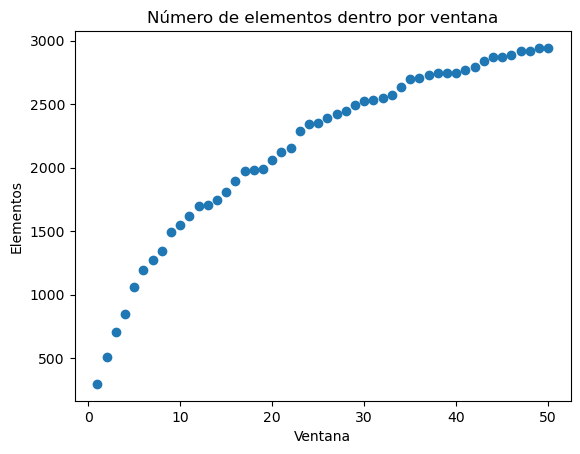

In [95]:
plt.scatter(np.linspace(1,50,endpoint=True),lens)
plt.title('Número de elementos dentro por ventana')
plt.xlabel('Ventana')
plt.ylabel('Elementos')
plt.show()

In [96]:
lens_out= np.zeros(50)
for i in range(1,50+1):
    leng_out = len(outside_dict[f'window_{i}'])
    lens_out[i-1]=leng_out

In [97]:
len(outside_dict['window_48'])

27

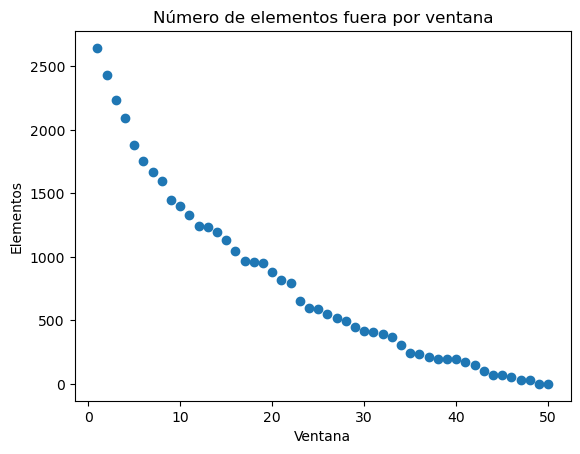

In [98]:
plt.scatter(np.linspace(1,50,endpoint=True),lens_out)
plt.title('Número de elementos fuera por ventana')
plt.xlabel('Ventana')
plt.ylabel('Elementos')
plt.show()

In [99]:
log_N_MgII_50 = outside_dict['window_48']['N-MgII']

err_log_N_MgII_50 = outside_dict['window_48']['e_NMgII']

bins_50 = np.linspace(log_N_MgII_50.min(), log_N_MgII_50.max(), 14)
hist_50, bin_edges_50 = np.histogram(log_N_MgII_50, bins=bins_50)

bins_centers_50 = bin_edges_50 + np.abs((bin_edges_50[0]-bin_edges_50[1])/2)
print(bins_50)
outside_dict['window_48']['bin'] = pd.cut(outside_dict['window_48']['N-MgII'], bins = bins_50, labels = False)

bin_err_50 = outside_dict['window_48'].groupby('bin')['e_NMgII'].apply(lambda x: np.sqrt(np.sum(x**2)))


#log_N_MgII_50

[11.17       11.37384615 11.57769231 11.78153846 11.98538462 12.18923077
 12.39307692 12.59692308 12.80076923 13.00461538 13.20846154 13.41230769
 13.61615385 13.82      ]


C:\Users\Agustín\AppData\Local\Temp\ipykernel_8968\369422088.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outside_dict['window_48']['bin'] = pd.cut(outside_dict['window_48']['N-MgII'], bins = bins_50, labels = False)


In [100]:
# Listas para almacenar los resultados
results_within = []
results_outside = []

# Iterar sobre las ventanas y calcular pendientes y errores
for i in range(1, 50 + 1):
    window_key = f'window_{i}'
    
    # Calcular para `within`
    m_within, m_error_within = calculate_slope(within_dict[window_key])
    results_within.append({'window': i, 'slope': m_within, 'error': m_error_within})
    


C:\Users\Agustín\AppData\Local\Temp\ipykernel_8968\233812136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin'] = pd.cut(df['N-MgII'], bins = bins, labels = False)


In [101]:
# Iterar sobre las ventanas y calcular pendientes y errores
for i in range(1, 36):
    window_key = f'window_{i}'
    
    # Calcular para `within`
    m_outside, m_error_outside = calculate_slope(outside_dict[window_key])
    results_outside.append({'window': i, 'slope': m_outside, 'error': m_error_outside})

C:\Users\Agustín\AppData\Local\Temp\ipykernel_8968\233812136.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin'] = pd.cut(df['N-MgII'], bins = bins, labels = False)


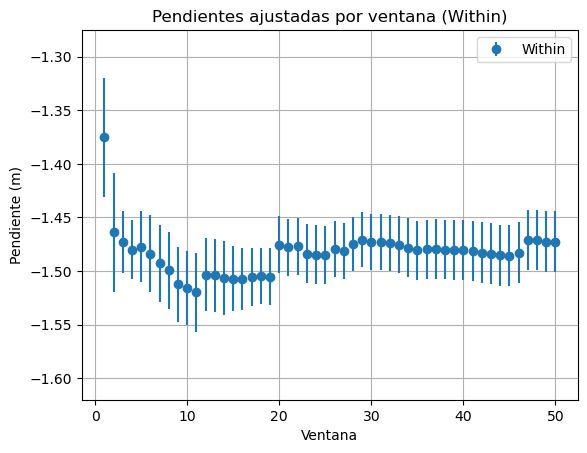

In [102]:

df_results_within = pd.DataFrame(results_within)
plt.errorbar(
    df_results_within['window'], df_results_within['slope'],
    yerr=df_results_within['error'], fmt='o', label='Within'
)

plt.xlabel('Ventana')
plt.ylabel('Pendiente (m)')
plt.title('Pendientes ajustadas por ventana (Within)')
plt.ylim(df_results_within['slope'].min() - 0.1, df_results_within['slope'].max() + 0.1)
plt.legend()
plt.grid()
plt.show()

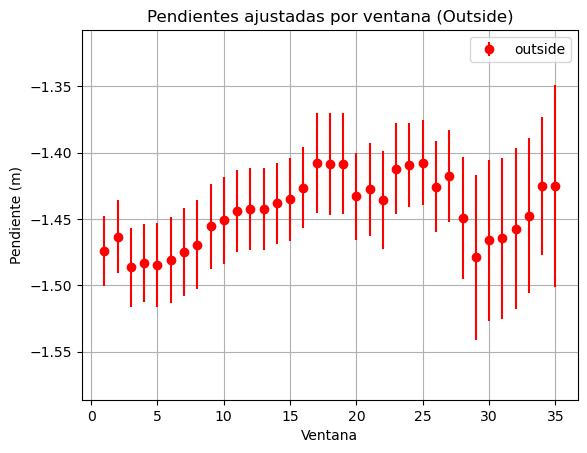

In [107]:
df_results_outside = pd.DataFrame(results_outside)
plt.errorbar(
    df_results_outside['window'], df_results_outside['slope'],
    yerr=df_results_outside['error'], fmt='o', label='outside', color ='red'
)

plt.xlabel('Ventana')
plt.ylabel('Pendiente (m)')
plt.title('Pendientes ajustadas por ventana (Outside)')
plt.ylim(df_results_outside['slope'].min() - 0.1, df_results_outside['slope'].max() + 0.1)
plt.legend()
plt.grid()
plt.show()

In [104]:
windows = np.linspace(np.abs(outside_dict['window_1']['velocities']).min(),np.abs(outside_dict['window_1']['velocities']).max(),50)

In [105]:
(windows[1]-windows[0])

1387.3703288758911

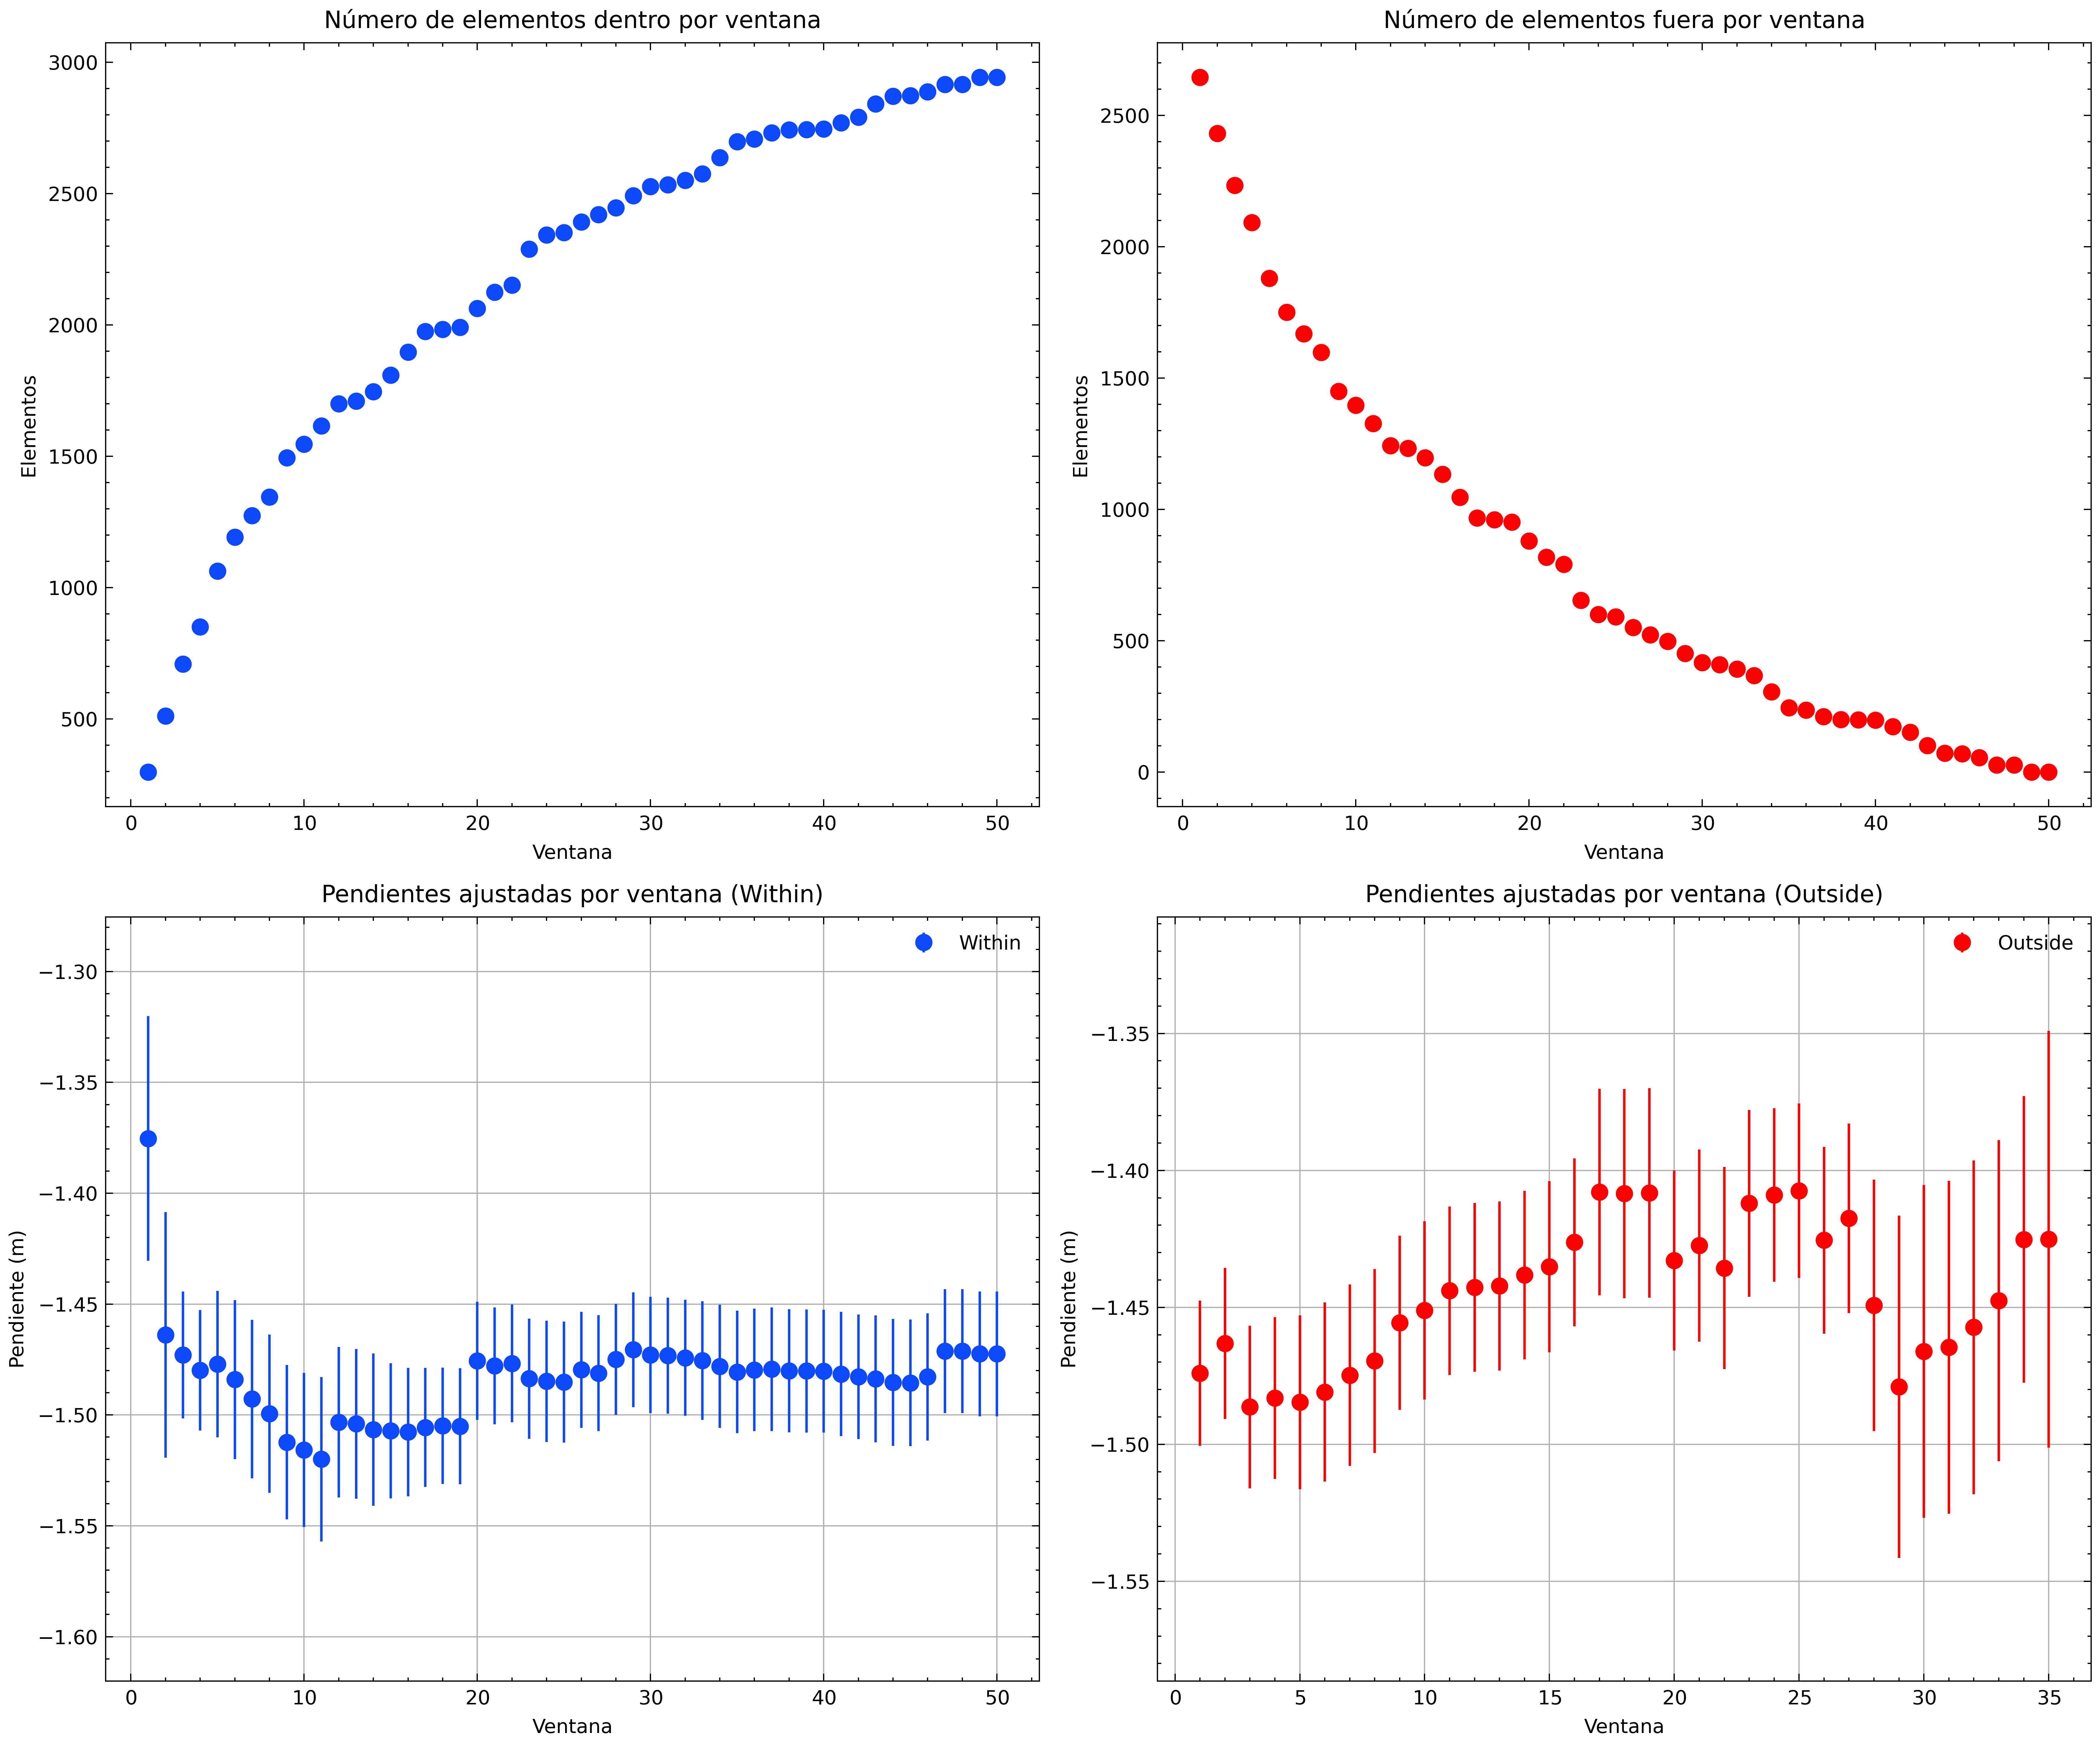

In [114]:
# Crear subplots
import scienceplots
import matplotlib as mpl
plt.style.use(['science', 'ieee', 'high-vis','no-latex'])
mpl.rcParams['font.family'] = 'DejaVu Sans'  # Configurar fuente compatible


fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1: Número de elementos dentro por ventana
axs[0, 0].scatter(np.linspace(1, 50, endpoint=True), lens)
axs[0, 0].set_title('Número de elementos dentro por ventana')
axs[0, 0].set_xlabel('Ventana')
axs[0, 0].set_ylabel('Elementos')

# Gráfico 2: Número de elementos fuera por ventana
axs[0, 1].scatter(np.linspace(1, 50, endpoint=True), lens_out, color ='red')
axs[0, 1].set_title('Número de elementos fuera por ventana')
axs[0, 1].set_xlabel('Ventana')
axs[0, 1].set_ylabel('Elementos')

# Gráfico 3: Pendientes ajustadas por ventana (Within)
axs[1, 0].errorbar(
    df_results_within['window'], df_results_within['slope'],
    yerr=df_results_within['error'], fmt='o', label='Within'
)
axs[1, 0].set_title('Pendientes ajustadas por ventana (Within)')
axs[1, 0].set_xlabel('Ventana')
axs[1, 0].set_ylabel('Pendiente (m)')
axs[1, 0].legend()
axs[1, 0].grid()
axs[1, 0].set_ylim(
    min(df_results_within['slope']) - 0.1, max(df_results_within['slope']) + 0.1
)

# Gráfico 4: Pendientes ajustadas por ventana (Outside)
axs[1, 1].errorbar(
    df_results_outside['window'], df_results_outside['slope'],
    yerr=df_results_outside['error'], fmt='o', label='Outside', color='red'
)
axs[1, 1].set_title('Pendientes ajustadas por ventana (Outside)')
axs[1, 1].set_xlabel('Ventana')
axs[1, 1].set_ylabel('Pendiente (m)')
axs[1, 1].legend()
axs[1, 1].grid()
axs[1, 1].set_ylim(
    min(df_results_outside['slope']) - 0.1, max(df_results_outside['slope']) + 0.1
)

# Ajustar espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()